In [66]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = None

# Load Dataframe for Analysis

In [67]:
df_analysis = pd.read_csv('analysis.csv')
df_analysis['gpt4_label'] = df_analysis['gpt4_label'].str.lower()
df_analysis['gpt4translated_label'] = df_analysis['gpt4translated_label'].str.lower()

# Rename 'mixed' sentiments as neutral
df_analysis['gpt4translated_label'] = df_analysis['gpt4translated_label'].str.replace('mix', 'neu')
df_analysis['gpt4_label'] = df_analysis['gpt4_label'].str.replace('mix', 'neu')

print('Size of complete dataset:',df_analysis.shape)

df_analysis = df_analysis.dropna(subset=['py_label', 'py_confidence', 'gpt4_label', 'gpt4_confidence'])
print('Size of dataset after dropping na for scores:',df_analysis.shape)

# Create a spanish subset, to be fair as RoBERTuito is trained on Spanish dataset, to avoid any bias from other languages
df_spanish = df_analysis[df_analysis['Tweet_Language'] == 'es']
print('Size of dataset filtered for Spanish language:',df_spanish.shape)


Size of complete dataset: (3227, 26)
Size of dataset after dropping na for scores: (3227, 26)
Size of dataset filtered for Spanish language: (2614, 26)


In [68]:
print(df_spanish.columns)
print(df_spanish.info())

Index(['Unnamed: 0', 'Tweet_ID', 'Conversation_ID', 'nb_mentions',
       'Tweet_Date', 'Used_Hashtag(s)', 'user_age_days', 'Tweet_Language',
       'Views_Count', 'Likes_Count', 'Replies_Count', 'Retweets_Count',
       'Quotes_Count', 'User_Handle_hashed', 'Blue_Verified',
       'Followers_Count', 'Total_Tweets', 'Combined_Hashtags', 'Tweet_cleaned',
       'py_label', 'py_confidence', 'gpt4_label', 'gpt4_confidence',
       'Tweet_translated', 'gpt4translated_label',
       'gpt4translated_confidence'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 2614 entries, 0 to 3221
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2614 non-null   int64  
 1   Tweet_ID                   2614 non-null   int64  
 2   Conversation_ID            2614 non-null   int64  
 3   nb_mentions                400 non-null    float64
 4   Tweet_Date            

In [69]:
df_spanish.head(3)

,Unnamed: 0,Tweet_ID,Conversation_ID,nb_mentions,Tweet_Date,Used_Hashtag(s),user_age_days,Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,User_Handle_hashed,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned,py_label,py_confidence,gpt4_label,gpt4_confidence,Tweet_translated,gpt4translated_label,gpt4translated_confidence
0,0,1741214666901041466,1741214666901041466,4.0,2023-12-30 21:48:21+00:00,"#LeyELAya, #sanidadextremeña, #SaludMental, #terapias, #vivirdignamente",5704,es,35,1,0,1,0,5374596364976420931,False,1286,12795,"'#SaludMental', '#terapias', ' #terapias', ' #vivirdignamente', '#vivirdignamente', '#LeyELAya', ' #sanidadextremeña', '#sanidadextremeña', ' #SaludMental'","Noticias que me alegran: No lo esperaba. ley elaya Si dotaran a la sanidadextremeña de más medios por la salud mental,(subvencionar nuestras terapias privadas, vivirdignamente) doblemente",pos,0.803672,pos,0.68524,"Here's the translation without altering the tone of the original text:\n\n""News that makes me happy: I didn't expect it. ley elaya If they provided the healthcare in Extremadura with more resources for mental health (subsidizing our private therapies, living with dignity) doubly so""",pos,0.76234
1,1,1741125298324726123,1741125298324726123,NaN,2023-12-30 15:53:14+00:00,NaN,4352,es,1026,3,6,0,0,1099547531843043501,False,4621,70754,NaN,"Esto es pregunta, creéis que la cultura rollo lil peep, xxxtentation, skins, cosas tristes, etc, tiene una conexión con el incremento de tasa de suicidio etc? Para mí tiene peso importante en cómo se forma la mente de personas jóvenes pero lo mismo meto la pata al decir esto",neg,0.650126,neu,0.94563,"This is a question: Do you think that the culture around Lil Peep, XXXTentacion, Skins, sad things, etc., has a connection with the increase in the suicide rate etc.? For me, it has significant weight in shaping the minds of young people, but I might be putting my foot in my mouth by saying this.",neu,0.82764
2,2,1741086961933124054,1741086961933124054,NaN,2023-12-30 13:20:54+00:00,#ánimoquetodopasa,3482,es,32,0,0,0,0,7019719136225777545,False,19,657,'#ánimoquetodopasa',"ENHORABUENA y sobre todo, GRACIAS de todo corazón para tod(s) aquell(s), q hacen, en mayor ó menor medida Y con ó sin ánimo d lucro, por mejorar la ""salud mental"" del personal...con su experiencia/sabiduría, esfuerzo, empatía y sobre todo, sentido del humor! ánimoquetodopasa",pos,0.896481,pos,0.95000,"CONGRATULATIONS and above all, THANK YOU from the bottom of my heart to all those who, to a greater or lesser extent, and whether or not for profit, work to improve the ""mental health"" of everyone... with their experience/wisdom, effort, empathy, and above all, sense of humor! Keep going, everything passes.",pos,0.98652


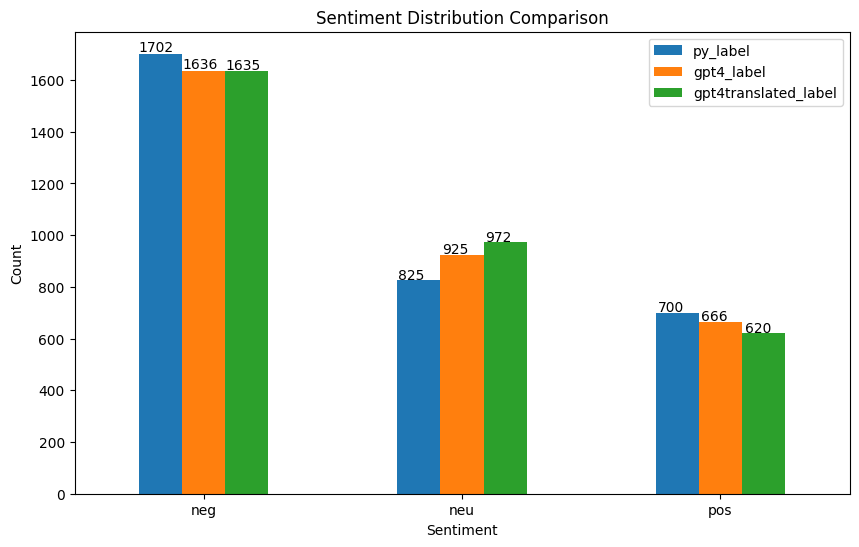

In [70]:
import matplotlib.pyplot as plt

py_sentiment_counts = df_analysis['py_label'].value_counts()
gpt4_sentiment_counts = df_analysis['gpt4_label'].value_counts()
gpt4translated_sentiment_counts = df_analysis['gpt4translated_label'].value_counts()


sentiment_comparison = pd.DataFrame({
    'py_label': py_sentiment_counts,
    'gpt4_label': gpt4_sentiment_counts,
    'gpt4translated_label': gpt4translated_sentiment_counts
}).fillna(0)

# Plot side by side with counts displayed on the bars
ax = sentiment_comparison.plot(kind='bar', figsize=(10, 6), title='Sentiment Distribution Comparison', ylabel='Count')

# Display the count on top of the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.show()

Only Spanish language

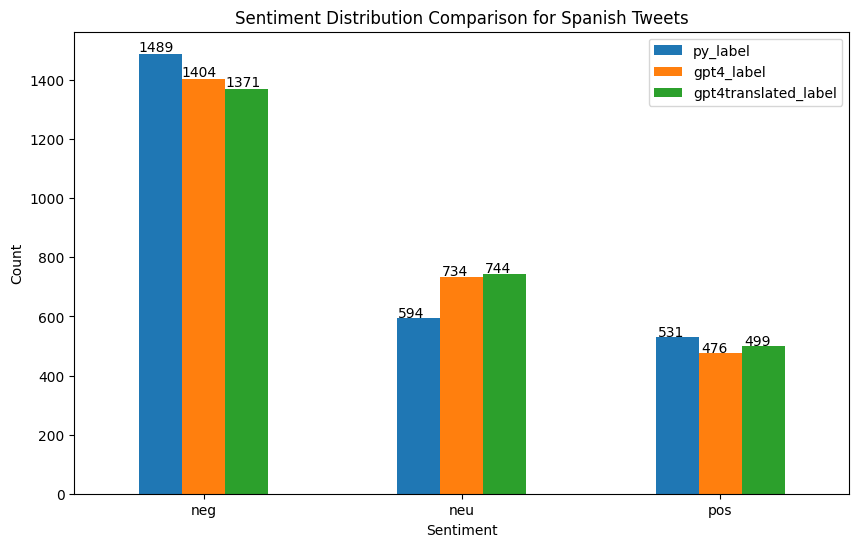

In [71]:

# Calculate sentiment counts for the filtered DataFrame
py_sentiment_counts_es = df_spanish['py_label'].value_counts()
gpt4_sentiment_counts_es = df_spanish['gpt4_label'].value_counts()
gpt4translated_sentiment_counts_es = df_spanish['gpt4translated_label'].value_counts()

# Combine the counts into a single DataFrame for comparison
sentiment_comparison_es = pd.DataFrame({
    'py_label': py_sentiment_counts_es,
    'gpt4_label': gpt4_sentiment_counts_es,
    'gpt4translated_label': gpt4translated_sentiment_counts_es
}).fillna(0)

# Plot side by side with counts displayed on the bars
ax = sentiment_comparison_es.plot(kind='bar', figsize=(10, 6), title='Sentiment Distribution Comparison for Spanish Tweets', ylabel='Count')

# Display the count on top of the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.show()

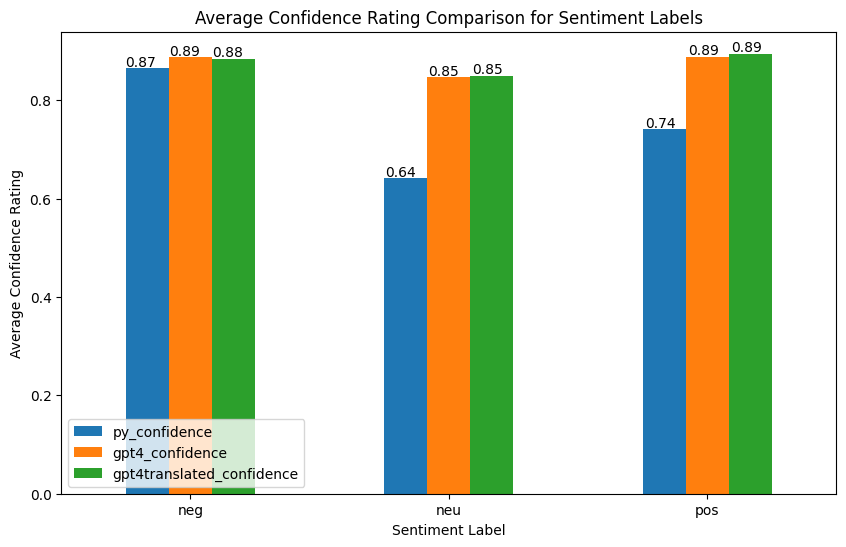

In [72]:

# Exclude the 'mix' label
tmp_df = df_spanish[(df_spanish['gpt4_label'] != 'mix') & (df_spanish['gpt4translated_label'] != 'mix')]

# Calculate the average confidence rating for each label and approach
average_confidence = tmp_df.groupby('py_label').agg({
    'py_confidence': 'mean',
    'gpt4_confidence': 'mean',
    'gpt4translated_confidence': 'mean'
}).reset_index()

average_confidence.set_index('py_label', inplace=True)

# Plot side by side with counts displayed on the bars
ax = average_confidence.plot(kind='bar', figsize=(10, 6), title='Average Confidence Rating Comparison for Sentiment Labels', ylabel='Average Confidence Rating')

# Display the average confidence rating on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xlabel('Sentiment Label')
plt.xticks(rotation=0)
plt.show()

In [73]:
average_confidence

,py_confidence,gpt4_confidence,gpt4translated_confidence
py_label,,,
neg,0.865573,0.887648,0.884344
neu,0.641537,0.847213,0.849742
pos,0.741329,0.889077,0.894879


The average confident ratings are relatively high across all label/ approach, except for the neutral ratings produced by pysentimiento.

Low confidence rating for neutral posts may mean that there may be some understatement in positive/ negative.

Negative posts remain the majority.  Translating the texts to english slightly increases GPT4o positive label but in exchange reduces the number of negative.

In [74]:
# Look at the posts with conflicting labels between translated/ non translated
tmp = df_spanish[df_spanish['gpt4_label']!= df_spanish['gpt4translated_label']]

# Choose relevant columns
tmp_cols = ['Tweet_cleaned', 'gpt4_label','gpt4translated_label', 'py_label', 'Views_Count']

# Take the top viewed posts
tmp[tmp_cols].sort_values(by='Views_Count', ascending=False).head(20)

,Tweet_cleaned,gpt4_label,gpt4translated_label,py_label,Views_Count
2693,"trisquel, triskelion o triskel en breves me lo tatúo porque antes de pensar en tatuármelo me ponía ansiosa y atacada pero ya no y no por mí !h",neu,pos,neg,38712
1532,El se estaba riendo pero cuidado que al día siguiente podía tener depresion no? Manifestación venga jaja 🤦‍,neg,neu,neg,15597
1592,"Miguel Guerrero, el gran psicólogo : Una sociedad más igualitaria y cohesiva, menos competitiva y q prestase especial atención a las relaciones sociales ayudaría realmente a prevenir el suicidio Necesario avanzar en estrategias sociales",pos,neu,pos,10507
1393,"19 años, estudiando (algo que no me gusta para OJALÁ en un futuro estudiar lo que me gusta) y trabajando(esports y no esports), con la mejor pareja del mundo,sin depresión y cada vez menos ansiedad, con pocas expectativas a corto plazo de mejora, pero muchas ganas de crecer",neu,pos,pos,9859
1104,"Se la ha ido la eliminatoria a Boca en 5 minutos, entendible por la presión y la ansiedad de llevarte el partido pero para ser campeón necesitas sangre fría, pinta a que estas semifinales se las lleva Palmeiras.",neg,neu,neg,9116
2092,"Empujar cada día una empresa llena de vicisitudes y conseguir que siga creciendo, nueva familia preciosa, comer y viajar, luchar contra la ansiedad, sanar con running, volar a Granada para acompañar a la consulta de onco implorando una prórroga. La belleza y el empeño de existir.",pos,neu,pos,5180
416,Riley ansiedad / Mi ansiedad.,neu,neg,neg,4902
951,"Salud Mental también es decir: ""No puedo más"", frenar y redirigir el caminoporque la vida, a veces, se hace muy cuesta arriba. Seguimos . dia internacional de la salud mental",neu,pos,neg,4572
1997,". y son Toreros con chanclas: ""Tenemos repertorio para tres horas, pero ¿por qué humillar a Bruce Springsteen?"" (...) ""Estamos haciendo una gran labor por la salud mental española"" (...) ""Hace falta reírse"". Hoy en",pos,neu,neg,4366
2277,"Necesito más shows drag y de artistas que me gusten,en espacios seguros y aptos para personas con ansiedad social, con un horario que no me obligue a ""salir de fiesta"" idea que a veces me gusta y otras me aterroriza. Ojalá más variedad de drags en teatros y performances diurnas.",neu,pos,neu,4191


# Further Cleaning

In [75]:
# emojis are masked with 'emoji', url and user mentions are replaced by placeholders.  We reove them as we already have columns for those

import re

def remove_substrings(text, substrings):
    # Define the regex pattern for 'emoji'
    emoji_pattern = r'emoji\s.*?emoji'
    # Remove the 'emoji' pattern
    text = re.sub(emoji_pattern, '', text).strip()

    # Remove other substrings
    for substring in substrings:
        text = text.replace(substring, '')

    return text

# List of substrings to remove
substrings_to_remove = ['url', '@usuario', 'usuario']

# Apply the function to the DataFrame
df_spanish['Tweet_cleaned'] = df_spanish['Tweet_cleaned'].apply(remove_substrings, substrings=substrings_to_remove)
df_spanish.head()

/var/folders/w7/2mrnjh050bn87z4_9_dgm8pw0000gn/T/ipykernel_47428/1650718586.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,Tweet_ID,Conversation_ID,nb_mentions,Tweet_Date,Used_Hashtag(s),user_age_days,Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,User_Handle_hashed,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned,py_label,py_confidence,gpt4_label,gpt4_confidence,Tweet_translated,gpt4translated_label,gpt4translated_confidence
0,0,1741214666901041466,1741214666901041466,4.0,2023-12-30 21:48:21+00:00,"#LeyELAya, #sanidadextremeña, #SaludMental, #terapias, #vivirdignamente",5704,es,35,1,0,1,0,5374596364976420931,False,1286,12795,"'#SaludMental', '#terapias', ' #terapias', ' #vivirdignamente', '#vivirdignamente', '#LeyELAya', ' #sanidadextremeña', '#sanidadextremeña', ' #SaludMental'","Noticias que me alegran: No lo esperaba. ley elaya Si dotaran a la sanidadextremeña de más medios por la salud mental,(subvencionar nuestras terapias privadas, vivirdignamente) doblemente",pos,0.803672,pos,0.68524,"Here's the translation without altering the tone of the original text:\n\n""News that makes me happy: I didn't expect it. ley elaya If they provided the healthcare in Extremadura with more resources for mental health (subsidizing our private therapies, living with dignity) doubly so""",pos,0.76234
1,1,1741125298324726123,1741125298324726123,NaN,2023-12-30 15:53:14+00:00,NaN,4352,es,1026,3,6,0,0,1099547531843043501,False,4621,70754,NaN,"Esto es pregunta, creéis que la cultura rollo lil peep, xxxtentation, skins, cosas tristes, etc, tiene una conexión con el incremento de tasa de suicidio etc? Para mí tiene peso importante en cómo se forma la mente de personas jóvenes pero lo mismo meto la pata al decir esto",neg,0.650126,neu,0.94563,"This is a question: Do you think that the culture around Lil Peep, XXXTentacion, Skins, sad things, etc., has a connection with the increase in the suicide rate etc.? For me, it has significant weight in shaping the minds of young people, but I might be putting my foot in my mouth by saying this.",neu,0.82764
2,2,1741086961933124054,1741086961933124054,NaN,2023-12-30 13:20:54+00:00,#ánimoquetodopasa,3482,es,32,0,0,0,0,7019719136225777545,False,19,657,'#ánimoquetodopasa',"ENHORABUENA y sobre todo, GRACIAS de todo corazón para tod(s) aquell(s), q hacen, en mayor ó menor medida Y con ó sin ánimo d lucro, por mejorar la ""salud mental"" del personal...con su experiencia/sabiduría, esfuerzo, empatía y sobre todo, sentido del humor! ánimoquetodopasa",pos,0.896481,pos,0.95000,"CONGRATULATIONS and above all, THANK YOU from the bottom of my heart to all those who, to a greater or lesser extent, and whether or not for profit, work to improve the ""mental health"" of everyone... with their experience/wisdom, effort, empathy, and above all, sense of humor! Keep going, everything passes.",pos,0.98652
3,3,1741083228109222003,1741083228109222003,NaN,2023-12-30 13:06:04+00:00,NaN,4582,es,30206,462,9,77,3,3667104985978684545,True,68208,12295,NaN,No hago cardio para perder grasa. Hago cardio para: Mejor estado de ánimo. Mejor salud cardiovascular. Mejor rendimiento cognitivo. Mejor salud mental. Mejor descanso.,neu,0.586005,pos,0.97654,I don't do cardio to lose fat. I do cardio for: Better mood. Better cardiovascular health. Better cognitive performance. Better mental health. Better rest.,pos,0.97324
4,4,1741055907415363929,1741055907415363929,NaN,2023-12-30 11:17:30+00:00,NaN,4358,es,91,2,0,0,0,5686384800043529882,False,289,5340,NaN,"La verdadera pandemia. Principal causa externa de muerte el año pasado. Seguimos sin concienciarnos sobre esta situación. La salud mental no está al alcance de todos y esto irá a peor. Por cierto, un 74% varones.",neg,0.980618,neg,0.92457,"The real pandemic. Leading external cause of death last year. We still haven't raised awareness about this situation. Mental health is not accessible to everyone, and this will get worse. By the way, 74% males.",neg,0.92345


# Engagement Metrics

In [76]:
df_analysis[['Likes_Count', 'Replies_Count', 'Retweets_Count', 'Quotes_Count']].describe()

,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count
count,3227.000000,3227.000000,3227.000000,3227.000000
mean,14.450883,0.874496,2.153083,0.173846
std,233.317301,7.955942,28.287232,2.227002
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,1.000000,0.000000
max,11167.000000,345.000000,1437.000000,109.000000


## Engagement correlation analysis

/var/folders/w7/2mrnjh050bn87z4_9_dgm8pw0000gn/T/ipykernel_47428/1382655796.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



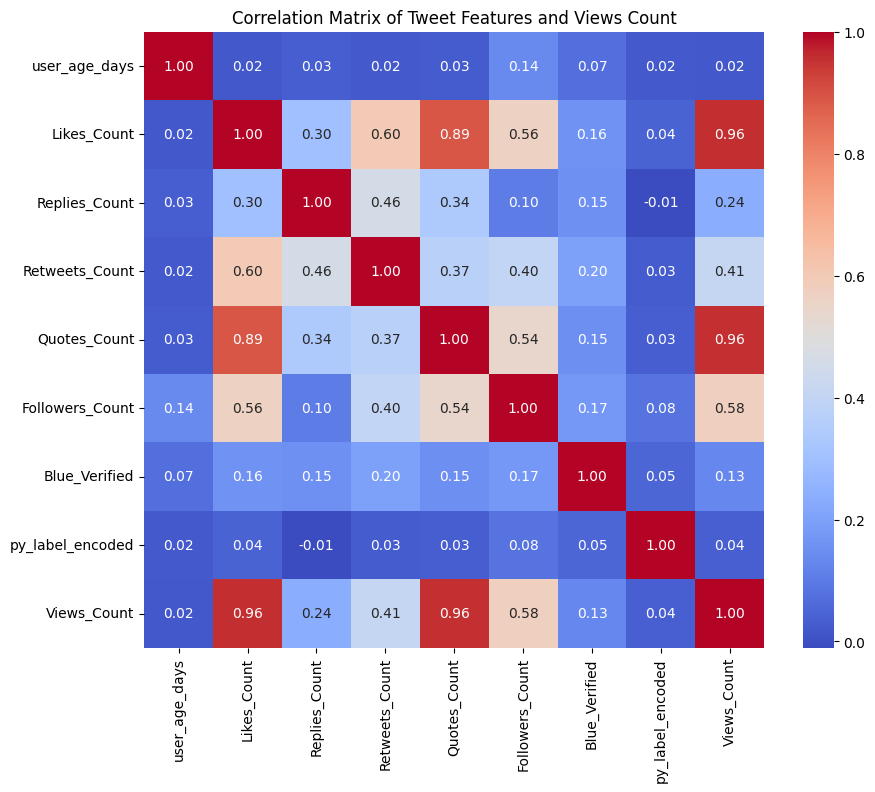

In [77]:
# Relevant features

df_spanish.loc[:,'py_label_encoded'] = df_spanish['py_label'].map({'pos': 1, 'neu': 0, 'neg': -1})

relevant_features = [
    'user_age_days', 'Likes_Count', 'Replies_Count',
    'Retweets_Count', 'Quotes_Count', 'Followers_Count',
    'Blue_Verified', 'py_label_encoded', 'Views_Count'
]

correlation_matrix = df_spanish[relevant_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Tweet Features and Views Count')
plt.show()

From Statistical perspective

In [78]:
df_spanish.head(3)

,Unnamed: 0,Tweet_ID,Conversation_ID,nb_mentions,Tweet_Date,Used_Hashtag(s),user_age_days,Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,User_Handle_hashed,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned,py_label,py_confidence,gpt4_label,gpt4_confidence,Tweet_translated,gpt4translated_label,gpt4translated_confidence,py_label_encoded
0,0,1741214666901041466,1741214666901041466,4.0,2023-12-30 21:48:21+00:00,"#LeyELAya, #sanidadextremeña, #SaludMental, #terapias, #vivirdignamente",5704,es,35,1,0,1,0,5374596364976420931,False,1286,12795,"'#SaludMental', '#terapias', ' #terapias', ' #vivirdignamente', '#vivirdignamente', '#LeyELAya', ' #sanidadextremeña', '#sanidadextremeña', ' #SaludMental'","Noticias que me alegran: No lo esperaba. ley elaya Si dotaran a la sanidadextremeña de más medios por la salud mental,(subvencionar nuestras terapias privadas, vivirdignamente) doblemente",pos,0.803672,pos,0.68524,"Here's the translation without altering the tone of the original text:\n\n""News that makes me happy: I didn't expect it. ley elaya If they provided the healthcare in Extremadura with more resources for mental health (subsidizing our private therapies, living with dignity) doubly so""",pos,0.76234,1
1,1,1741125298324726123,1741125298324726123,NaN,2023-12-30 15:53:14+00:00,NaN,4352,es,1026,3,6,0,0,1099547531843043501,False,4621,70754,NaN,"Esto es pregunta, creéis que la cultura rollo lil peep, xxxtentation, skins, cosas tristes, etc, tiene una conexión con el incremento de tasa de suicidio etc? Para mí tiene peso importante en cómo se forma la mente de personas jóvenes pero lo mismo meto la pata al decir esto",neg,0.650126,neu,0.94563,"This is a question: Do you think that the culture around Lil Peep, XXXTentacion, Skins, sad things, etc., has a connection with the increase in the suicide rate etc.? For me, it has significant weight in shaping the minds of young people, but I might be putting my foot in my mouth by saying this.",neu,0.82764,-1
2,2,1741086961933124054,1741086961933124054,NaN,2023-12-30 13:20:54+00:00,#ánimoquetodopasa,3482,es,32,0,0,0,0,7019719136225777545,False,19,657,'#ánimoquetodopasa',"ENHORABUENA y sobre todo, GRACIAS de todo corazón para tod(s) aquell(s), q hacen, en mayor ó menor medida Y con ó sin ánimo d lucro, por mejorar la ""salud mental"" del personal...con su experiencia/sabiduría, esfuerzo, empatía y sobre todo, sentido del humor! ánimoquetodopasa",pos,0.896481,pos,0.95000,"CONGRATULATIONS and above all, THANK YOU from the bottom of my heart to all those who, to a greater or lesser extent, and whether or not for profit, work to improve the ""mental health"" of everyone... with their experience/wisdom, effort, empathy, and above all, sense of humor! Keep going, everything passes.",pos,0.98652,1


In [79]:
import statsmodels.api as sm

# Convert Blue_Verified to integer
df_spanish.loc[:,'Blue_Verified'] = df_spanish['Blue_Verified'].astype(int)

# Consider py_labels as category instead of ordinal number to see if it improves the significance
df_spanish.loc[:,'py_label_dummy'] = df_spanish['py_label'].copy()
df_spanish = pd.get_dummies(df_spanish, columns=['py_label_dummy'], drop_first=False, dtype=int)

relevant_features = [
    'user_age_days', 'Likes_Count', 'Replies_Count',
    'Retweets_Count', 'Quotes_Count', 'Followers_Count',
    'Blue_Verified', 'py_label_dummy_neu', 'py_label_dummy_pos', 'Views_Count',
]

# Prepare the data for regression analysis
X = df_spanish[relevant_features].drop(columns=['Views_Count'])
y = df_spanish['Views_Count']

model = sm.OLS(y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Views_Count   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          2.104e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):                        0.00
Time:                        22:35:36   Log-Likelihood:                         -23446.
No. Observations:                2614   AIC:                                  4.691e+04
Df Residuals:                    2605   BIC:                                  4.696e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

/var/folders/w7/2mrnjh050bn87z4_9_dgm8pw0000gn/T/ipykernel_47428/642232135.py:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.

/var/folders/w7/2mrnjh050bn87z4_9_dgm8pw0000gn/T/ipykernel_47428/642232135.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Changing label to category does not improve the significance

In [80]:


df_spanish[relevant_features].head(3)

,user_age_days,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,Followers_Count,Blue_Verified,py_label_dummy_neu,py_label_dummy_pos,Views_Count
0,5704,1,0,1,0,1286,0,0,1,35
1,4352,3,6,0,0,4621,0,0,0,1026
2,3482,0,0,0,0,19,0,0,1,32


# User Information

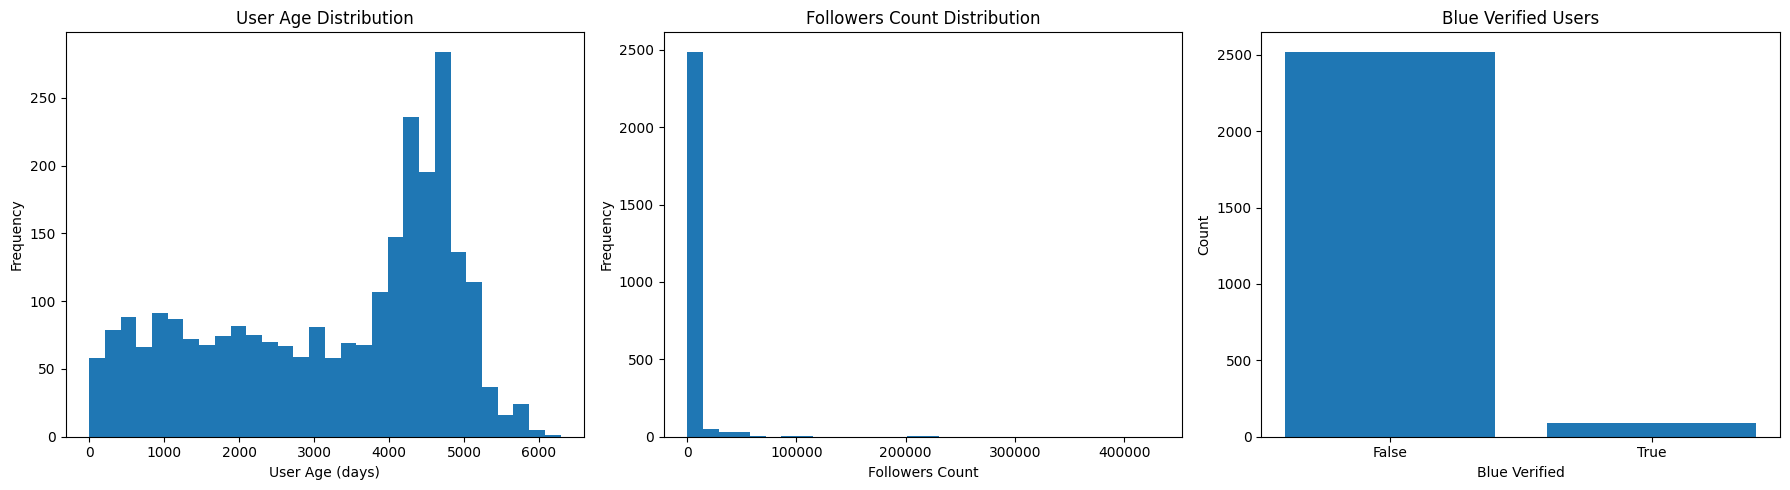

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot User Age Distribution
axes[0].hist(df_spanish['user_age_days'], bins=30)
axes[0].set_title('User Age Distribution')
axes[0].set_xlabel('User Age (days)')
axes[0].set_ylabel('Frequency')

# Plot Followers Count Distribution
axes[1].hist(df_spanish['Followers_Count'], bins=30)
axes[1].set_title('Followers Count Distribution')
axes[1].set_xlabel('Followers Count')
axes[1].set_ylabel('Frequency')

# Plot Blue Verified Users
blue_verified_counts = df_spanish['Blue_Verified'].value_counts()
axes[2].bar(blue_verified_counts.index, blue_verified_counts)
axes[2].set_title('Blue Verified Users')
axes[2].set_xlabel('Blue Verified')
axes[2].set_ylabel('Count')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['False', 'True'])

# Display the plots
plt.tight_layout()
plt.show()

This first dataset consists of posts by users of various ages, calculated using their profile creation date.  The views count is extremely skewed to the right, indicating that most posts have a lower number of views, with a few posts having very high view counts.  However, most posts have no mentions, replies, reposts, or quotes, with a small number of posts having up to 13 mentions.  These distributions suggest that engagement metrics (likes, views, reposts, replies) follow a power-law distribution, common in social media data, where a small number of users and posts drive most of the engagement (Cameron, 2022).

# Language Analysis

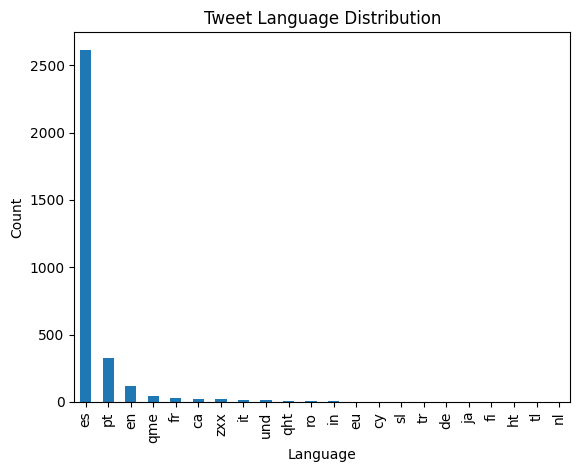

In [82]:
language_counts = df_analysis['Tweet_Language'].value_counts()
language_counts.plot(kind='bar', title='Tweet Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

# Analysing different categorization

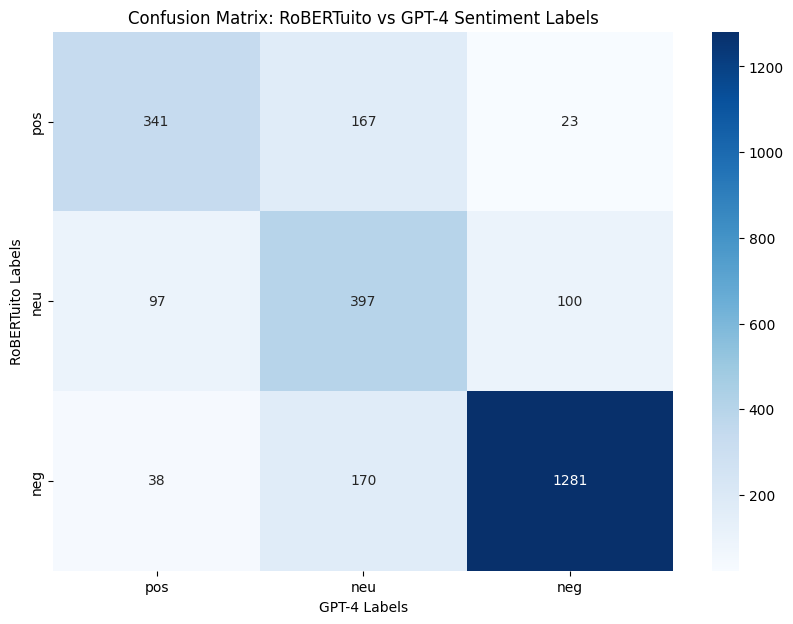

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cleaned_data = df_spanish[df_spanish['gpt4_label'].isin(['pos', 'neu', 'neg'])]

# Recreate the confusion matrix
conf_matrix = confusion_matrix(cleaned_data['py_label'], cleaned_data['gpt4_label'], labels=['pos', 'neu', 'neg'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['pos', 'neu', 'neg'], yticklabels=['pos', 'neu', 'neg'])
plt.xlabel('GPT-4 Labels')
plt.ylabel('RoBERTuito Labels')
plt.title('Confusion Matrix: RoBERTuito vs GPT-4 Sentiment Labels')
plt.show()

In [84]:
from sklearn.metrics import classification_report, accuracy_score

# Classification report and accuracy
classification_report(cleaned_data['py_label'], cleaned_data['gpt4_label'], labels=['pos', 'neu', 'neg'])


'              precision    recall  f1-score   support\n\n         pos       0.72      0.64      0.68       531\n         neu       0.54      0.67      0.60       594\n         neg       0.91      0.86      0.89      1489\n\n    accuracy                           0.77      2614\n   macro avg       0.72      0.72      0.72      2614\nweighted avg       0.79      0.77      0.78      2614\n'

In [85]:
discrepancies = cleaned_data[cleaned_data['py_label'] != cleaned_data['gpt4_label']]

# Sampling a few tweets for review
sample_discrepancies = discrepancies.sample(25, random_state=1)

sample_discrepancies[['Tweet_cleaned', 'py_label', 'gpt4_label','gpt4translated_label', 'py_confidence', 'gpt4_confidence', 'gpt4translated_confidence']]

,Tweet_cleaned,py_label,gpt4_label,gpt4translated_label,py_confidence,gpt4_confidence,gpt4translated_confidence
2400,"Tú decides! paramahansa Yogananda. yoga pensamientoypoder saludmental emociones en Universoyoga -Armonía mente, cuerpo y emociones",neu,pos,neu,0.521779,0.82000,0.92500
2316,Que mi madre me acaba de llamar preguntando cómo he estado hoy diciéndome que mi padre está preocupado por mí y que quieren hablar conmigo respecto a mi salud mental/física por los exámenes porque me conocen y saben cómo me pongo cuando tengo exámenes y presión...,neg,neu,neu,0.626101,0.70834,0.92000
2050,La ansiedad NO es más fuerte que tú. Créditos a en México,neg,pos,pos,0.812281,0.85234,0.87456
1427,ES LA SUMA DE PERSONAS Y PROYECTOS DE VIDA COTIDIANOS DEL MUNDO DE LAS REDES SOCIALES EN EL CUAL DESTACAN CON DONDE SUS TEORIAS Y ACUERDOS SON DEBATIDOS EN CONSEJOS DE EDUCACION PARLAMENTARIA,pos,neu,neu,0.666497,0.85000,0.70000
2072,"Estas pautas y recomendaciones te ayudarán a prepararte psicológicamente para los exámenes que estás afrontando estas semanas. Confiamos en que te ayuden a controlar el estrés, ansiedad, y otros malestares que puedas estar sintiendo. examen saludmental psicología estudios",pos,neu,pos,0.561531,0.97000,0.89642
2353,El sef es a la orientación laboral como el psicólogo de la seguridad social a la salud mental.,neg,neu,neu,0.592769,0.75000,0.90000
1109,tesla GRAN DEPRESIÓN a las puertas?,neu,neg,neg,0.724328,0.86734,0.91457
1510,"NUEVAS PLAZAS: Voluntariado en Salud Mental. Estamos a punto de empezar el nuevo curso 2023/2024, y buscamos personas que quieran participar en una experiencia única y enriquecedora. voluntariado salud mental",pos,neu,pos,0.731776,0.95325,0.94532
1998,"Un tercio de la mortalidad atribuible a las islas de calor podría evitarse plantando vegetación en un 30% del espacio urbano. La vegetación, además, reduce la contaminación atmosférica, mitiga la contaminación sonora y mejora la salud mental:",neu,pos,pos,0.615009,0.95234,0.85432
1,"Esto es pregunta, creéis que la cultura rollo lil peep, xxxtentation, skins, cosas tristes, etc, tiene una conexión con el incremento de tasa de suicidio etc? Para mí tiene peso importante en cómo se forma la mente de personas jóvenes pero lo mismo meto la pata al decir esto",neg,neu,neu,0.650126,0.94563,0.82764


Through this sample, the labeling inconsistence do not favor one model over the others.  In the end sentiment analysis, even when performed by human, is a subjective task.
We faced the following options to proceed with the analysis:
- choose one model in particular
- perform majority vote to define the label

In the end, we decided to stick with pysentimiento label, which was developed on a known dataset on an open source model.

Although OpenAI may offer various means of data manipulation (translation, etc), it is a LLM with unknown dataset and algorithm.

Based on this, we have reservations in utilizing such model to inform our recommendations, especially when it is related to public health and well-being overall.

Thus, GPT-4o is used purely as a benchmark and our analysis will continue to use pysentimiento labels.

In [86]:
# Let's compute the absolute difference in labelling for both models

py_label_counts = cleaned_data['py_label'].value_counts()
gpt4_label_counts = cleaned_data['gpt4_label'].value_counts()
gpt4translated_label_counts = cleaned_data['gpt4translated_label'].value_counts()

count_comparison = pd.concat([py_label_counts, gpt4_label_counts, gpt4translated_label_counts], axis=1)
count_comparison.columns = ['py_label', 'gpt4_label', 'gpt4translated_labels']
count_comparison

,py_label,gpt4_label,gpt4translated_labels
neg,1489,1404,1371
neu,594,734,744
pos,531,476,499


In [87]:
def compare_models(df,models):
    comparison = df[models]
    comparison['diff'] = abs(comparison[models[0]] - comparison[models[1]])
    return comparison['diff'].sum() / comparison['py_label'].sum()

print('the difference between pysentimiento and gpt application as is:', compare_models(count_comparison,['py_label', 'gpt4_label']))
print('the difference between pysentimiento and gpt **translated application**:', compare_models(count_comparison,['py_label', 'gpt4translated_labels']))

the difference between pysentimiento and gpt application as is: 0.10711553175210406
the difference between pysentimiento and gpt **translated application**: 0.11476664116296863


In [88]:
# Analyze engagement metrics for labels generated by pysentimiento
engagement_metrics = df_spanish[['Likes_Count', 'Retweets_Count', 'Replies_Count', 'Views_Count', 'py_label']].groupby('py_label').median()
engagement_metrics

,Likes_Count,Retweets_Count,Replies_Count,Views_Count
py_label,,,,
neg,1.0,0.0,0.0,133.0
neu,1.0,0.0,0.0,125.0
pos,3.0,0.0,0.0,191.0


Usually when a dataset is severely imbalanced, we look at the median instead of average.

However, in this case, as big majority of tweets have 0 engagement as established earlier, we opt to look at the mean.

In [89]:
# Analyze engagement metrics for labels generated by pysentimiento
engagement_metrics = df_spanish[['Likes_Count', 'Retweets_Count', 'Replies_Count', 'Views_Count', 'py_label']].groupby('py_label').mean()
engagement_metrics

,Likes_Count,Retweets_Count,Replies_Count,Views_Count
py_label,,,,
neg,8.053727,1.726662,1.033580,749.991941
neu,5.875421,1.686869,0.427609,497.592593
pos,26.225989,2.807910,0.962335,2538.028249


# Hashtags Used

In [90]:
df_spanish.loc[:,'Combined_Hashtags'] = df_spanish['Combined_Hashtags'].str.lower()
df_spanish.loc[:,'Combined_Hashtags'] = df_spanish['Combined_Hashtags'].str.replace("'", "")

df_spanish.head(3)

,Unnamed: 0,Tweet_ID,Conversation_ID,nb_mentions,Tweet_Date,Used_Hashtag(s),user_age_days,Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,User_Handle_hashed,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned,py_label,py_confidence,gpt4_label,gpt4_confidence,Tweet_translated,gpt4translated_label,gpt4translated_confidence,py_label_encoded,py_label_dummy_neg,py_label_dummy_neu,py_label_dummy_pos
0,0,1741214666901041466,1741214666901041466,4.0,2023-12-30 21:48:21+00:00,"#LeyELAya, #sanidadextremeña, #SaludMental, #terapias, #vivirdignamente",5704,es,35,1,0,1,0,5374596364976420931,0,1286,12795,"#saludmental, #terapias, #terapias, #vivirdignamente, #vivirdignamente, #leyelaya, #sanidadextremeña, #sanidadextremeña, #saludmental","Noticias que me alegran: No lo esperaba. ley elaya Si dotaran a la sanidadextremeña de más medios por la salud mental,(subvencionar nuestras terapias privadas, vivirdignamente) doblemente",pos,0.803672,pos,0.68524,"Here's the translation without altering the tone of the original text:\n\n""News that makes me happy: I didn't expect it. ley elaya If they provided the healthcare in Extremadura with more resources for mental health (subsidizing our private therapies, living with dignity) doubly so""",pos,0.76234,1,0,0,1
1,1,1741125298324726123,1741125298324726123,NaN,2023-12-30 15:53:14+00:00,NaN,4352,es,1026,3,6,0,0,1099547531843043501,0,4621,70754,NaN,"Esto es pregunta, creéis que la cultura rollo lil peep, xxxtentation, skins, cosas tristes, etc, tiene una conexión con el incremento de tasa de suicidio etc? Para mí tiene peso importante en cómo se forma la mente de personas jóvenes pero lo mismo meto la pata al decir esto",neg,0.650126,neu,0.94563,"This is a question: Do you think that the culture around Lil Peep, XXXTentacion, Skins, sad things, etc., has a connection with the increase in the suicide rate etc.? For me, it has significant weight in shaping the minds of young people, but I might be putting my foot in my mouth by saying this.",neu,0.82764,-1,1,0,0
2,2,1741086961933124054,1741086961933124054,NaN,2023-12-30 13:20:54+00:00,#ánimoquetodopasa,3482,es,32,0,0,0,0,7019719136225777545,0,19,657,#ánimoquetodopasa,"ENHORABUENA y sobre todo, GRACIAS de todo corazón para tod(s) aquell(s), q hacen, en mayor ó menor medida Y con ó sin ánimo d lucro, por mejorar la ""salud mental"" del personal...con su experiencia/sabiduría, esfuerzo, empatía y sobre todo, sentido del humor! ánimoquetodopasa",pos,0.896481,pos,0.95000,"CONGRATULATIONS and above all, THANK YOU from the bottom of my heart to all those who, to a greater or lesser extent, and whether or not for profit, work to improve the ""mental health"" of everyone... with their experience/wisdom, effort, empathy, and above all, sense of humor! Keep going, everything passes.",pos,0.98652,1,0,0,1


In [91]:
# Get all unique hashtags inside the nested list of 'Combined_Hashtags' column
hashtags = df_spanish['Combined_Hashtags'].dropna().str.split(', ').explode()

# Remove duplicates
unique_hashtags = hashtags.str.strip().drop_duplicates()

In [92]:
#Let's count the tweets for each hashtag based on the exploded list
tweet_count = {}
for hashtag in hashtags:
    tmp_df = df_spanish[df_spanish['Combined_Hashtags'].str.contains(hashtag, na=False)]
    tweet_count[hashtag] = tmp_df['Tweet_ID'].count()

In [93]:
hashtag_stats = {}

# Iterate over each unique hashtag in the exploded list
for hashtag in unique_hashtags:
    # Filter the DataFrame for the current hashtag
    hashtag_df = df_spanish[df_spanish['Combined_Hashtags'].str.contains(hashtag, na=False)]

    # Calculate the sums of the specified columns
    sums = hashtag_df[['Views_Count', 'Likes_Count', 'Replies_Count', 'Retweets_Count', 'Quotes_Count']].sum()

    # Calculate the number of unique tweets containing the hashtag
    tweet_count = hashtag_df['Tweet_ID'].nunique()

    # Calculate the number of unique users who tweeted with the hashtag
    unique_users = hashtag_df['User_Handle_hashed'].nunique()

    # Store the results in the dictionary
    hashtag_stats[hashtag] = {
        'Views_Count': sums['Views_Count'],
        'Likes_Count': sums['Likes_Count'],
        'Replies_Count': sums['Replies_Count'],
        'Retweets_Count': sums['Retweets_Count'],
        'Quotes_Count': sums['Quotes_Count'],
        'Tweet_Count': tweet_count,
        'Unique_Users': unique_users
    }

# Convert the dictionary to a DataFrame for easier viewing
hashtag_stats_df = pd.DataFrame(hashtag_stats).transpose()

# Based on first run, #día and #madrid is included as top 12 hashtag but doesn't bring any meaning to this analysis, we modify the extract
top_hashtags_list = hashtag_stats_df.sort_values(by=['Tweet_Count'], ascending=False).head(12).index.tolist()
top_hashtags_list.remove('#día')
top_hashtags_list.remove('#madrid')

top_hashtags_df = hashtag_stats_df.sort_values(by=['Tweet_Count'], ascending=False).head(12)
top_hashtags_df.drop('#día', inplace=True)
top_hashtags_df.drop('#madrid', inplace=True)
top_hashtags_df

,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,Tweet_Count,Unique_Users
#salud,245396,3346,190,855,41,316,162
#saludmental,239089,3256,189,826,37,306,159
#suicidio,62559,580,28,279,13,42,24
#ansiedad,8785,115,18,35,0,35,24
#afesol,4593,36,1,16,1,35,1
#diamundialdelasaludmental,21547,319,2,111,7,30,28
#depresión,17995,199,9,116,6,25,19
#psicología,22169,203,2,115,5,24,10
#fe,75318,1423,56,56,2,20,16
#autismo,5239,63,1,34,1,14,2


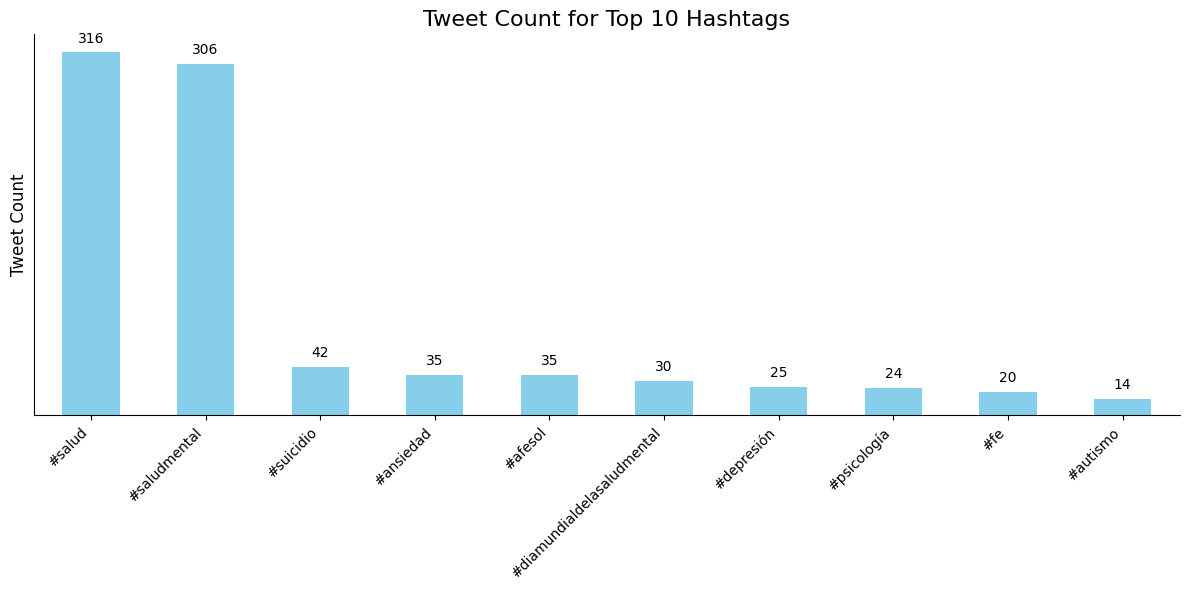

In [94]:
plt.figure(figsize=(12, 6))
ax = top_hashtags_df['Tweet_Count'].plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Tweet Count for Top 10 Hashtags', fontsize=16)
plt.ylabel('Tweet Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_ticks([])

# Removing the top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

In [95]:
df_spanish.dtypes

Unnamed: 0                     int64
Tweet_ID                       int64
Conversation_ID                int64
nb_mentions                  float64
Tweet_Date                    object
Used_Hashtag(s)               object
user_age_days                  int64
Tweet_Language                object
Views_Count                    int64
Likes_Count                    int64
Replies_Count                  int64
Retweets_Count                 int64
Quotes_Count                   int64
User_Handle_hashed             int64
Blue_Verified                  int64
Followers_Count                int64
Total_Tweets                   int64
Combined_Hashtags             object
Tweet_cleaned                 object
py_label                      object
py_confidence                float64
gpt4_label                    object
gpt4_confidence              float64
Tweet_translated              object
gpt4translated_label          object
gpt4translated_confidence    float64
py_label_encoded               int64
p

In [96]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# Datetime treatment
df_spanish['Tweet_Date'] = pd.to_datetime(df_spanish['Tweet_Date'])
df_spanish['Tweet_Date_Only'] = np.array(df_spanish['Tweet_Date'].dt.date, dtype='datetime64')

# Initialize the subplot figure
fig = make_subplots(rows=5, cols=2, subplot_titles=top_hashtags_list)
for i, hashtag in enumerate(top_hashtags_list):
    row = i // 2 + 1
    col = i % 2 + 1
    hashtag_df = df_spanish[df_spanish['Combined_Hashtags'].str.contains(hashtag, na=False)]
    hashtag_date_counts = hashtag_df.groupby('Tweet_Date_Only').size().reset_index(name='counts')
    fig.add_trace(
        go.Scatter(x=hashtag_date_counts['Tweet_Date_Only'], y=hashtag_date_counts['counts'], mode='lines+markers', name=hashtag),
        row=row, col=col
    )

# Update layout
fig.update_layout(title='Top 10 hashtags seasonality',height=1000, width=1200, showlegend=False)
fig.update_xaxes(title_text="Tweet Date")
fig.update_yaxes(title_text="Number of Tweets")

fig.show()

/Users/mnd/.pyenv/versions/3.10.12/envs/thesis/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/mnd/.pyenv/versions/3.10.12/envs/thesis/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/mnd/.pyenv/versions/3.10.12/envs/thesis/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

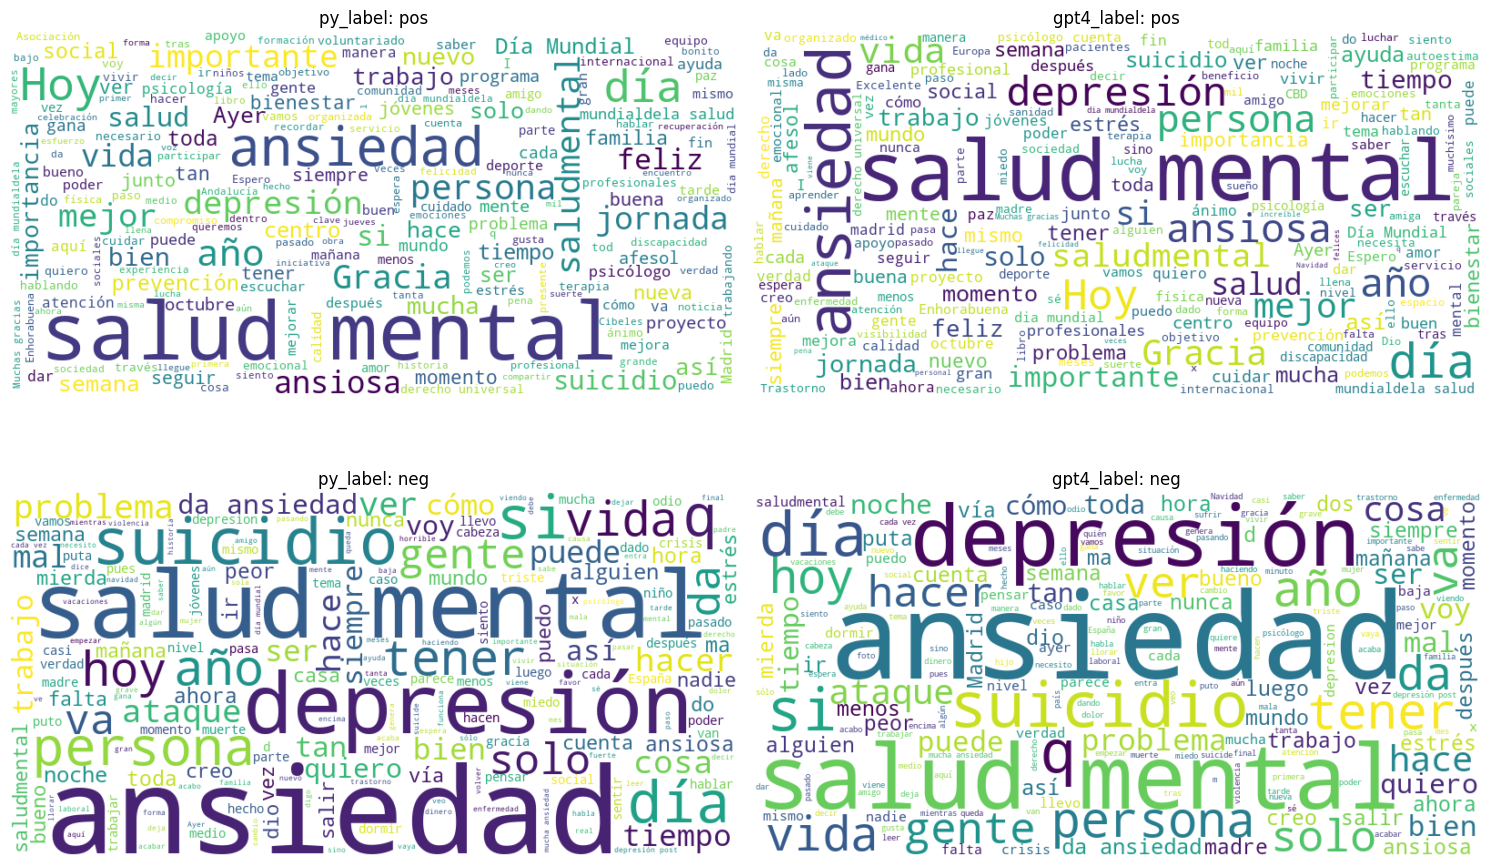

In [97]:
from wordcloud import WordCloud, STOPWORDS
from stop_words import get_stop_words


# Function to generate word cloud from text
def generate_wordcloud(text):
    stopwords = get_stop_words('es')
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(text)
    return wordcloud

# Filter tweets based on labels
pos_py = ' '.join(df_spanish[df_spanish['py_label'] == 'pos']['Tweet_cleaned'])
neg_py = ' '.join(df_spanish[df_spanish['py_label'] == 'neg']['Tweet_cleaned'])
pos_gpt4 = ' '.join(df_spanish[df_spanish['gpt4_label'] == 'pos']['Tweet_cleaned'])
neg_gpt4 = ' '.join(df_spanish[df_spanish['gpt4_label'] == 'neg']['Tweet_cleaned'])

# Generate word clouds
wordcloud_pos_py = generate_wordcloud(pos_py)
wordcloud_neg_py = generate_wordcloud(neg_py)
wordcloud_pos_gpt4 = generate_wordcloud(pos_gpt4)
wordcloud_neg_gpt4 = generate_wordcloud(neg_gpt4)

# Plot word clouds in a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Word cloud for pos_py
axs[0, 0].imshow(wordcloud_pos_py, interpolation='bilinear')
axs[0, 0].set_title('py_label: pos')
axs[0, 0].axis('off')

# Word cloud for pos_gpt4
axs[0, 1].imshow(wordcloud_pos_gpt4, interpolation='bilinear')
axs[0, 1].set_title('gpt4_label: pos')
axs[0, 1].axis('off')

# Word cloud for neg_py
axs[1, 0].imshow(wordcloud_neg_py, interpolation='bilinear')
axs[1, 0].set_title('py_label: neg')
axs[1, 0].axis('off')

# Word cloud for neg_gpt4
axs[1, 1].imshow(wordcloud_neg_gpt4, interpolation='bilinear')
axs[1, 1].set_title('gpt4_label: neg')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

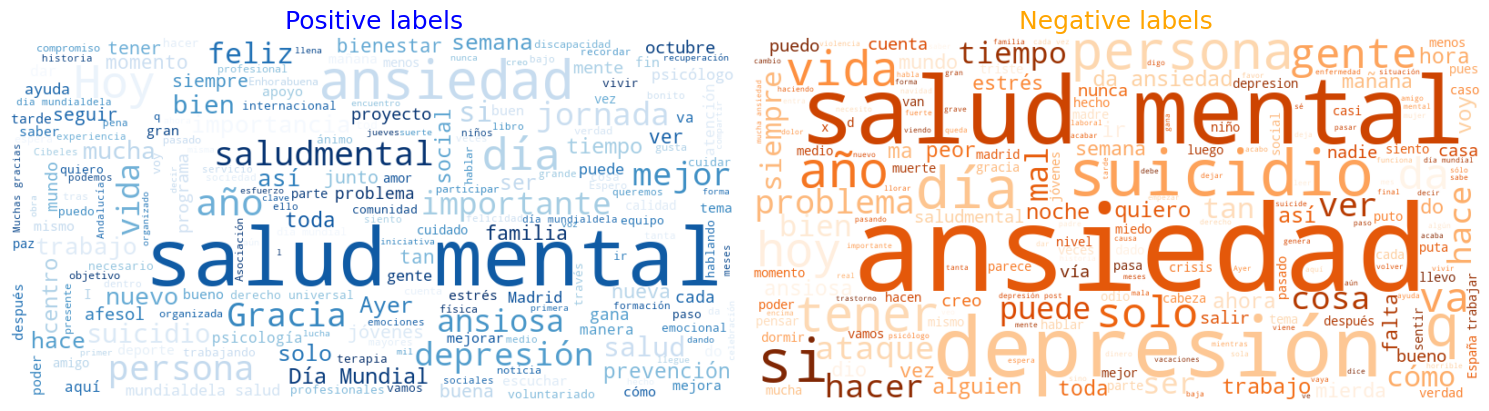

In [133]:
def generate_wordcloud(text, color):
    stopwords = get_stop_words('es')
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400, colormap=color).generate(text)
    return wordcloud

wordcloud_pos_py = generate_wordcloud(pos_py, 'Blues')
wordcloud_neg_py = generate_wordcloud(neg_py, 'Oranges')

# Plot word clouds in a 2x1 subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Word cloud for pos_py
axs[0].imshow(wordcloud_pos_py, interpolation='bilinear')
axs[0].set_title('Positive labels', color='blue', fontsize=18)
axs[0].axis('off')

# Word cloud for neg_py
axs[1].imshow(wordcloud_neg_py, interpolation='bilinear')
axs[1].set_title('Negative labels', color='orange', fontsize=18)
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [99]:
df_spanish[df_spanish['Tweet_cleaned'].str.contains('salud mental')].shape

(694, 31)

In [100]:
# Deep dive

# Understanding tweets containing salud mental

tmp_df = df_spanish[(df_spanish['py_label'] == 'neg') & (df_spanish['Tweet_cleaned'].str.contains('salud mental'))]

print(len(tmp_df))

tmp_df[['Tweet_cleaned', 'Views_Count']].sort_values(by='Views_Count', ascending=False).head(30)


299


,Tweet_cleaned,Views_Count
424,"Es lamentable. Muy desacertado Feijoó estigmatizando la salud mental para hacer confrontación política con la intención de intentar desprestigiar a Debería retirar sus palabras y pedir disculpas a las personas que tienen problemas de salud mental, dignas de",39502
1295,"Lo del pinganillo en el Congreso es una de las mayores vergüenzas de la democracia española, teniendo una lengua común tan rica, y hacer estas gilipolleces es para hacérselo mirar, ese dinero invertirlo en salud mental y evitar los suicidios diarios que de están produciendo, ya",19249
883,"La salud mental de los niños implicados en conflictos, que hoy eurodiputado del olvida cuando fue denunciado por violencia sobre la mujer, y que a los españoles hombres supone tener a sus hijos rehenes por leyes ideológicas. hamas terrorist gaza israel",6344
227,"Puerto: ""No tengo redes sociales, me ayuda a vivir con mejor salud mental"" debería ser de obligada lectura para todos los deportistas profesionales y niños y niñas de cantera. Ética de trabajo y gestión de redes de un chaval de 24 años",4849
951,"Salud Mental también es decir: ""No puedo más"", frenar y redirigir el caminoporque la vida, a veces, se hace muy cuesta arriba. Seguimos . dia internacional de la salud mental",4572
1997,". y son Toreros con chanclas: ""Tenemos repertorio para tres horas, pero ¿por qué humillar a Bruce Springsteen?"" (...) ""Estamos haciendo una gran labor por la salud mental española"" (...) ""Hace falta reírse"". Hoy en",4366
2382,Lo País sí que deteriora la salud mental.,4237
1519,yo a Luc lo conozco por tener un programa donde se visibilizan problemas como la salud mental y a ti por todas las movidas de marica mala en las que te metes corazón,3918
528,"Después pasan ciertas cosas y vienen las lamentaciones a posteriori. Vamos a dejarnos de juicios públicos y de intentar ser el más ""grasioso"" y el más ""original"". Que luego se nos llena la boca hablando de salud mental.",3598
609,"Pues hoy hacen 2 mesecitos justos que he entrado en la empresa. No tenía idea de cuánta satisfacción y salud mental habría ganado cambiando de trabajo. Si no estáis 100% satisfechos con vuestros trabajos, cambiad! Que la vida es demasiado corta para perder tiempo con el trabajo",3350


In [101]:
# Specific analysis
# Understanding tweets containing ansiedad but tagged as positive

keywords = r'ansiedad|depresión'
tmp_df = df_spanish[(df_spanish['py_label'] == 'pos') & (df_spanish['Tweet_cleaned'].str.contains(keywords, case=False, na=False))]

tmp_df[['Tweet_cleaned', 'Views_Count']].sort_values(by='Views_Count', ascending=False).head(30)


,Tweet_cleaned,Views_Count
1367,"27 años, jugador profesional y pudiendo vivir de ello desde 2015, ahora lo compagino creando contenido desde hace 3, con pareja desde hace 7, pocos amigos de verdad pero mucha gente que me quiere, sin depresión ni ansiedad, mi objetivo es disfrutar y seguir mejorando",798136
152,-voy a dormir a casa de orslok +chi amor? me da un poco de ansiedad pero pásalo bien bb :3 eres la mejor -me lo he follado Viviendoenlacalle por una carretera secundaria:,101745
1357,"29 años, con mi propia empresa, con el dinero suficiente para estar tranquila, con la mejor pareja del mundo, con pocos amigos pero verdaderos, sin ansiedad ni depresión, con expectativas de mejorar todo esto a corto plazo. *borracha pero buena muchacha*",11594
570,Ea po ya estamos de camino qué ansiedad carajo!!!,11068
1393,"19 años, estudiando (algo que no me gusta para OJALÁ en un futuro estudiar lo que me gusta) y trabajando(esports y no esports), con la mejor pareja del mundo,sin depresión y cada vez menos ansiedad, con pocas expectativas a corto plazo de mejora, pero muchas ganas de crecer",9859
2092,"Empujar cada día una empresa llena de vicisitudes y conseguir que siga creciendo, nueva familia preciosa, comer y viajar, luchar contra la ansiedad, sanar con running, volar a Granada para acompañar a la consulta de onco implorando una prórroga. La belleza y el empeño de existir.",5180
2291,"Tras cinco intentos de suicidio, hoy, os digo que vivir merece la pena, y doy gracias a todo el que me apoyó en la lucha contra la depresión. Si estás en un momento duro, te animo a pedir ayuda. Juntxs podemos con ello. dia mundial contra la depresion",4853
200,"FRANCISCO, acerca de los delanteros: ""No podemos tener ansiedad con 20 puntos en la tabla. Hay que seguir confiando, trabajando y sabiendo que los jugadores que ahora no están bien van a dar un paso adelante y eso el equipo lo va a notar muchísimo"".",4488
1252,"Ayer tenía ansiedad sobre cómo sería el primer día de prácticas. Hoy realmente ha sido uno de los días más felices de mi vida. Que afortunado soy de compartir con esta peña, la primera de muchas rotaciones que tendremos los próximos cuatro años cirugia doceños rotacion ucm",4267
1331,"29 años, creadora de contenido que sigue ampliando estudios, sobreviviendo económicamente pero pudiéndome dar mis caprichos, con una pareja genial, controlando mi ansiedad, con metas a corto y medio plazo reales para que se cumplan y con una comunidad relinda. Buenos días, lindo",3590


In [102]:
# What about those tagged as negative?

tmp_df = df_spanish[(df_spanish['py_label'] == 'neg') & (df_spanish['Tweet_cleaned'].str.contains(keywords, case=False, na=False))]

tmp_df[['Tweet_cleaned', 'Views_Count']].sort_values(by='Views_Count', ascending=False).head(30)


,Tweet_cleaned,Views_Count
1086,"- Oye María estas más gordita desde la última vez que te vi - Sí, es que llevo más de un mes sin fumar y claro la ansiedad, ya sabes, pero vamos que tengo espejos en casa, gracias. Perdón por no tener un cuerpo normativo. Estoy cansada de tener que justificarme por mi peso",135176
591,que depresión que sea de noche tan pronto,126403
818,"Toda Europa con alerta terrorista y mi novio azafato de vuelo, hoy tiene vuelo a dos aeropuertos que ayer evacuaron por alerta de bomba en Francia y encima yo con ansiedad crónica. No puc mes.",43863
1634,"Los Spaces relacionados con el SevillaFC producen depresión. Me es imposible aguantar ni un ratito. La vida es muy bonita para estar siempre amargado, aunque haya motivos. Salud y SevillaFC",23460
2205,"Estigma y Dolor Crónico. ""El dolor está en tu mente"", ""tienes muy buen aspecto para tener dolor"", ""te estás volviendo loco"", ""solo quieres llamar la atención"", ""es solo estrés, ansiedad"", ""qué bien estás de baja"" Cuánto daño hemos podido hacer",13825
874,DEPRESIÓN POST MAGNA 🪫,12184
1104,"Se la ha ido la eliminatoria a Boca en 5 minutos, entendible por la presión y la ansiedad de llevarte el partido pero para ser campeón necesitas sangre fría, pinta a que estas semifinales se las lleva Palmeiras.",9116
1728,"Se comenta, se rumorea que hoy hay globos por aquí. 27 años ya, que depresión Me quitáis el disgusto con algún fichaje hoy?",8317
731,"1:33 de la mañana: he descubierto un error que aparece durante apenas 4 segundos de los 33 minutos de mi último vídeo. Entro en ansiedad, cabreo y una espiral autodestructiva por una estupidez que a nadie le importa. Quiero borrar el vídeo. Ya se que no puedo. Pero quiero.",7845
2305,"Los datos sobre la depresión son devastadores. Casi 3 millones de personas sufren este trastorno mental en España. ¿Cómo actuar si crees que algún familiar, amigo o conocido pueda estar padeciendo depresión? Os facilitamos algunos consejos: hablemos de depresión psicología",5739


In [103]:
#Let's compare the engagement for posts containing these keyword

keywords = r'ansiedad|depresión'
tmp = df_spanish[df_spanish['Tweet_cleaned'].str.contains(keywords, case=False, na=False)]

# Analyze engagement metrics for labels generated by pysentimiento
engagement_metrics = tmp[['Likes_Count', 'Retweets_Count', 'Replies_Count', 'Views_Count', 'py_label']].groupby('py_label').mean()
engagement_metrics

,Likes_Count,Retweets_Count,Replies_Count,Views_Count
py_label,,,,
neg,7.554585,1.120087,0.834061,699.062227
neu,4.551351,0.686486,0.518919,438.427027
pos,63.690647,3.417266,1.086331,7196.352518


This finding is even more interesting.  Understanding that the posts containing 'ansiedad' and 'depression' tagged as positive are messages of hope, it is understandable that people

# Seasonality of Sentiment Analysis

In [104]:
import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.graph_objs as go
import plotly.express as px

## Generic/ global level

/var/folders/w7/2mrnjh050bn87z4_9_dgm8pw0000gn/T/ipykernel_47428/1704933926.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



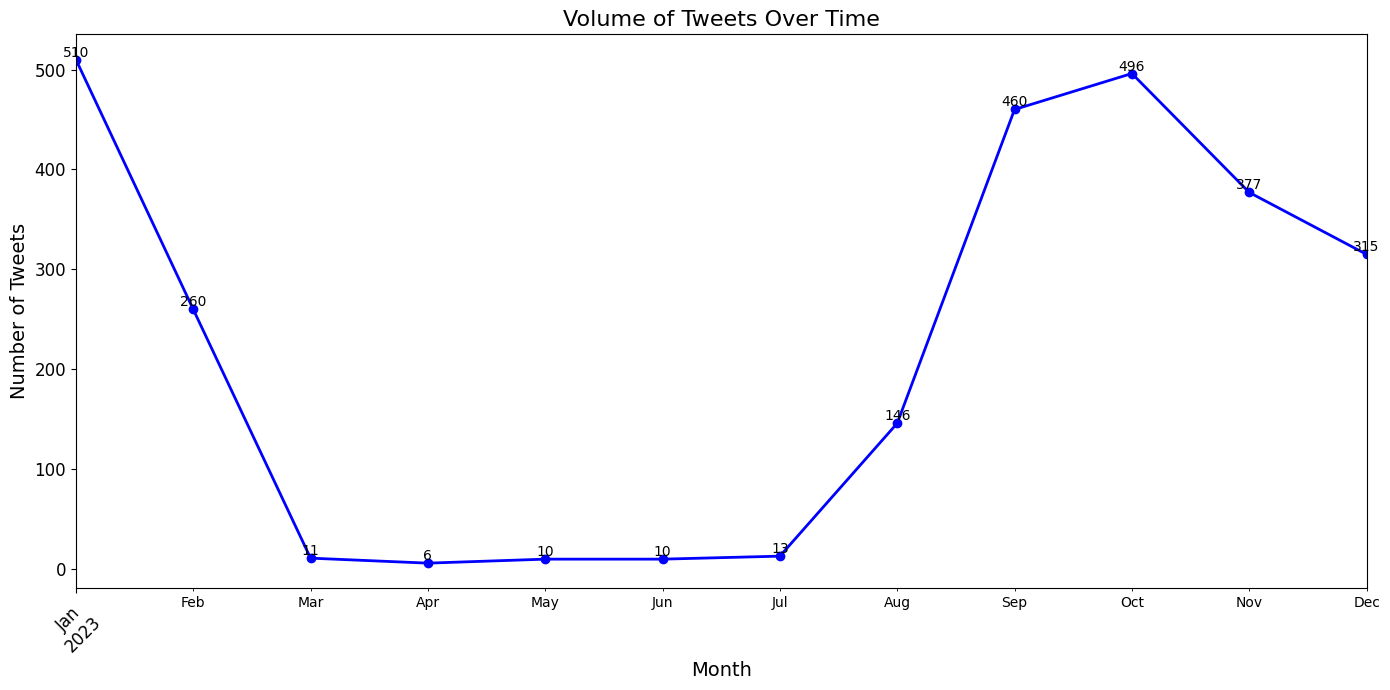

In [105]:
df_spanish.loc[:,'Tweet_Date'] = pd.to_datetime(df_spanish['Tweet_Date'])
df_spanish.loc[:,'Month'] = df_spanish['Tweet_Date'].dt.to_period('M')

# Volume of tweets over time
tweet_volume = df_spanish.groupby('Month').size()

# Sentiment over time
sentiment_over_time = df_spanish.groupby(['Month', 'py_label']).size().unstack().fillna(0)

# Plot volume of tweets over time
plt.figure(figsize=(14, 7))
ax = tweet_volume.plot(kind='line', marker='o', linestyle='-', color='b', markersize=6, linewidth=2)

# Set title and labels with increased font size
plt.title('Volume of Tweets Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)

# Remove gridlines for a cleaner look
ax.grid(False)

# Customize ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add text annotations
for i in range(len(tweet_volume)):
    plt.text(tweet_volume.index[i], tweet_volume.iloc[i], str(tweet_volume.iloc[i]),
             ha='center', va='bottom', fontsize=10, color='black')

# Add a tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [106]:

py_label_counts_df = df_spanish.groupby(['Tweet_Date_Only', 'py_label']).size().unstack(fill_value=0)

# Create subplots
fig = make_subplots(rows=1, cols=1, subplot_titles=('Daily trend of py_label',))

# Add traces for py_label
for label in py_label_counts_df.columns:
    fig.add_trace(go.Scatter(x=py_label_counts_df.index, y=py_label_counts_df[label], mode='lines', name=f'py_label: {label}'), row=1, col=1)

# Update layout
fig.update_layout(
    title_text='Sentiment Trend Over Time',
    xaxis_title='Time',
    yaxis_title='Tweet Volume',
    height=400,
    width=1200,
    legend=dict(
    x=0,
    y=1,
    traceorder='normal',
    bgcolor='rgba(0,0,0,0)',
    bordercolor='rgba(0,0,0,0)'
)
)

# Show plot
fig.show()

### Engagement at global level

In [107]:
# Analyze engagement metrics for labels generated by pysentimiento
engagement_metrics = df_spanish[['Likes_Count', 'Retweets_Count', 'Replies_Count', 'Views_Count', 'py_label']].groupby('py_label').mean()
engagement_metrics

,Likes_Count,Retweets_Count,Replies_Count,Views_Count
py_label,,,,
neg,8.053727,1.726662,1.033580,749.991941
neu,5.875421,1.686869,0.427609,497.592593
pos,26.225989,2.807910,0.962335,2538.028249


In [108]:
# Analyze engagement metrics for labels generated by gpt4o as-is
engagement_metrics = df_spanish[['Likes_Count', 'Retweets_Count', 'Replies_Count', 'Views_Count', 'gpt4_label']].groupby('gpt4_label').mean()
engagement_metrics

,Likes_Count,Retweets_Count,Replies_Count,Views_Count
gpt4_label,,,,
neg,7.946581,1.650285,1.066239,719.900997
neu,8.384196,2.204360,0.576294,720.331063
pos,25.413866,2.371849,0.806723,2564.153361


In [109]:
# Analyze engagement metrics for labels generated by gpt4o translated to English
engagement_metrics = df_spanish[['Likes_Count', 'Retweets_Count', 'Replies_Count', 'Views_Count', 'gpt4translated_label']].groupby('gpt4translated_label').mean()
engagement_metrics

,Likes_Count,Retweets_Count,Replies_Count,Views_Count
gpt4translated_label,,,,
neg,7.899344,1.600292,1.075128,711.151714
neu,8.412634,2.306452,0.541667,683.673387
pos,24.687375,2.312625,0.855711,2557.833667


### Top 10 Hashtags

In [110]:
# Create subplots
fig = make_subplots(rows=10, cols=1, subplot_titles=top_hashtags_list)

# Generate a plot for each of the top 10 hashtags
for i, hashtag in enumerate(top_hashtags_list):
    row = i + 1

    # Filter the DataFrame for the current hashtag
    hashtag_df = df_spanish[df_spanish['Combined_Hashtags'].str.contains(hashtag, na=False)]

    # Group by date and py_label, then unstack to get counts per label per day
    hashtag_label_counts = hashtag_df.groupby(['Tweet_Date_Only', 'py_label']).size().unstack(fill_value=0)

    # Add trace for each label
    for label in hashtag_label_counts.columns:
        fig.add_trace(
            go.Scatter(x=hashtag_label_counts.index, y=hashtag_label_counts[label], mode='lines+markers', name=f"{hashtag} - {label}", legendgroup=f'{i+1}'),
            row=row, col=1
        )


# Define the range for the x-axis to only span the year 2023
xaxis_range = ['2023-01-01', '2023-12-31']

# Update layout with smaller font sizes for axes
fig.update_layout(
    height=2700,
    width=1000,
    title_text="Seasonality of Different Labels in 'py_label' for Top 10 Hashtags Over Time",
    xaxis=dict(title_text="Tweet Date", title_font=dict(size=10), tickfont=dict(size=10)),
    yaxis=dict(title_text="Number of Tweets", title_font=dict(size=10), tickfont=dict(size=10)),
    legend_tracegroupgap=215
)

# Adjust xaxes and yaxes for all subplots and set the range for x-axis
for i in range(1, 11):
    fig.update_xaxes(title_text="Tweet Date", row=i, col=1, title_font=dict(size=10), tickfont=dict(size=10), range=xaxis_range)
    fig.update_yaxes(title_text="Number of Tweets", row=i, col=1, title_font=dict(size=10), tickfont=dict(size=10))

fig.show()

## Focusing on posts containing 'salud mental'

In [111]:
tmp_df = df_spanish[df_spanish['Tweet_cleaned'].str.contains('salud mental', na=False)]
salud_mental_df = tmp_df.groupby(['Tweet_Date_Only', 'py_label'])['Tweet_ID'].count().unstack(fill_value=0)

fig = go.Figure()

for label in salud_mental_df.columns:
    fig.add_trace(go.Scatter(x=salud_mental_df.index, y=salud_mental_df[label], mode='lines', name=f'py_label: {label}'))

fig.update_layout(
    title='X Posts with salud mental over time',
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    )
)

fig.show()

### Negative posts about salud mental

In [112]:
# check if this is the right df
tmp_df[tmp_df['Tweet_Date_Only'] == '2023-10-10'].groupby('py_label')['Tweet_ID'].count()

py_label
neg    28
neu    25
pos    46
Name: Tweet_ID, dtype: int64

In [113]:
tmp_df[tmp_df['py_label'] == 'neg'].sort_values(by=['Views_Count'], ascending=False)[['Tweet_cleaned', 'Views_Count', 'Tweet_Date_Only']].head(30)

,Tweet_cleaned,Views_Count,Tweet_Date_Only
424,"Es lamentable. Muy desacertado Feijoó estigmatizando la salud mental para hacer confrontación política con la intención de intentar desprestigiar a Debería retirar sus palabras y pedir disculpas a las personas que tienen problemas de salud mental, dignas de",39502,2023-11-21
1295,"Lo del pinganillo en el Congreso es una de las mayores vergüenzas de la democracia española, teniendo una lengua común tan rica, y hacer estas gilipolleces es para hacérselo mirar, ese dinero invertirlo en salud mental y evitar los suicidios diarios que de están produciendo, ya",19249,2023-09-19
883,"La salud mental de los niños implicados en conflictos, que hoy eurodiputado del olvida cuando fue denunciado por violencia sobre la mujer, y que a los españoles hombres supone tener a sus hijos rehenes por leyes ideológicas. hamas terrorist gaza israel",6344,2023-10-15
227,"Puerto: ""No tengo redes sociales, me ayuda a vivir con mejor salud mental"" debería ser de obligada lectura para todos los deportistas profesionales y niños y niñas de cantera. Ética de trabajo y gestión de redes de un chaval de 24 años",4849,2023-12-10
951,"Salud Mental también es decir: ""No puedo más"", frenar y redirigir el caminoporque la vida, a veces, se hace muy cuesta arriba. Seguimos . dia internacional de la salud mental",4572,2023-10-10
1997,". y son Toreros con chanclas: ""Tenemos repertorio para tres horas, pero ¿por qué humillar a Bruce Springsteen?"" (...) ""Estamos haciendo una gran labor por la salud mental española"" (...) ""Hace falta reírse"". Hoy en",4366,2023-02-01
2382,Lo País sí que deteriora la salud mental.,4237,2023-01-08
1519,yo a Luc lo conozco por tener un programa donde se visibilizan problemas como la salud mental y a ti por todas las movidas de marica mala en las que te metes corazón,3918,2023-09-06
528,"Después pasan ciertas cosas y vienen las lamentaciones a posteriori. Vamos a dejarnos de juicios públicos y de intentar ser el más ""grasioso"" y el más ""original"". Que luego se nos llena la boca hablando de salud mental.",3598,2023-11-13
609,"Pues hoy hacen 2 mesecitos justos que he entrado en la empresa. No tenía idea de cuánta satisfacción y salud mental habría ganado cambiando de trabajo. Si no estáis 100% satisfechos con vuestros trabajos, cambiad! Que la vida es demasiado corta para perder tiempo con el trabajo",3350,2023-11-06


### Deep dive on the peak on 9 Nov

In [115]:
# Checking the peak on 9 Nov

date_to_check = '2023-11-03'
print('double check that the chart is correct')
print(tmp_df[tmp_df['Tweet_Date_Only'] == date_to_check].groupby('py_label')['Tweet_ID'].count())

print('\nCheck the engagement metrics for the posts')
engagement_metrics = ['Views_Count', 'Likes_Count', 'Replies_Count', 'Retweets_Count', 'Quotes_Count']
print(tmp_df[tmp_df['Tweet_Date_Only'] == date_to_check].groupby('py_label')[engagement_metrics].sum())

print("\n Tweets marked as negative")

for tweet in tmp_df[((tmp_df['py_label'] == 'neg') & (tmp_df['Tweet_Date_Only'] == date_to_check))]['Tweet_cleaned']:
    print(tweet)


double check that the chart is correct
py_label
neg    9
neu    3
pos    1
Name: Tweet_ID, dtype: int64

Check the engagement metrics for the posts
          Views_Count  Likes_Count  Replies_Count  Retweets_Count  \
py_label                                                            
neg              2921           28              5               5   
neu               715            4              1               2   
pos               322            6              0               1   

          Quotes_Count  
py_label                
neg                  1  
neu                  0  
pos                  0  

 Tweets marked as negative
"Bojan, más allá de la sonrisa" es el reflejo de que muchas veces podemos tenerlo todo y no triunfar en este mundo, ya que nuestra salud mental juega un papel fundamental y condiciona nuestro comportamiento como seres humanos.     fcblive
¿Os imagináis 15.000 millones $ destinados a construir hospitales, contratar médicos, investigar contra el cáncer,

The peak seems to be related to an announcement related to investment focusing on Basque Country, however concerns are brewing around Buru Osasuna, being a region highlighted for mental health care.

The posts higlight the stigma and self-stigma associated with mental health, the insufficient resources and staffing in mental health services, 
and the heightened demand following the COVID-19 pandemic. 

Additionally, there is a critique of the allocation of public funds, emphasizing the need for better investment in healthcare and social services. 
This focus on mental health is particularly relevant in the context of significant regional events like the launch of the [“Basque Net Zero Industrial Super Cluster” on November 3, 2023](https://www.irekia.euskadi.eus/en/news/72753-industria-euskadi-compromete-alcanzar-cero-emisiones-netas-unira-cop26-glasgow-alianza-global-wef), 
which brought additional attention to the region’s public health and sustainability efforts

Seems like when there is a real/ actual concern of the people, there is possibility that a negative sentiment could spread faster than positive news, 
unlike the phenemona we see at global level

## Deep dive on peak on 21 Nov

In [116]:
# Checking the peak on 21 Nov

date_to_check = '2023-11-21'
print('double check that the chart is correct')
print(tmp_df[tmp_df['Tweet_Date_Only'] == date_to_check].groupby('py_label')['Tweet_ID'].count())

print('\nCheck the engagement metrics for the posts')
engagement_metrics = ['Views_Count', 'Likes_Count', 'Replies_Count', 'Retweets_Count', 'Quotes_Count']
print(tmp_df[tmp_df['Tweet_Date_Only'] == date_to_check].groupby('py_label')[engagement_metrics].sum())

print("\n Tweets marked as negative")
for tweet in tmp_df[((tmp_df['py_label'] == 'neg') & (tmp_df['Tweet_Date_Only'] == date_to_check))]['Tweet_cleaned']:
    print(tweet)


double check that the chart is correct
py_label
neg    7
neu    2
Name: Tweet_ID, dtype: int64

Check the engagement metrics for the posts
          Views_Count  Likes_Count  Replies_Count  Retweets_Count  \
py_label                                                            
neg             40189          720            347             285   
neu               227            4              1               1   

          Quotes_Count  
py_label                
neg                 17  
neu                  0  

 Tweets marked as negative
¿quien puede confiar en esta justicia?  leer lo q escribe este individuo q sigue siendo juez y ver q el CGPJ no ha reaccionado habla  para mal d la imparcialidad d parte d nuestros togados tras leer lo escrito lo obvio es dudar d la salud mental d este tipo
Jonathan Racionero (Concejal de Podemos) debate en la junta de portavoces de      "Es incoherente decir que a los 30 años no son jóvenes y decir que les preocupa la salud mental de los jóvenes, entr

The tweets on 21 November discuss various incidents and criticisms involving mental health, reflecting a significant public debate.
The tweets mention a judge’s controversial remarks, a political debate involving Jonathan Racionero, and a heated exchange between Feijoo and Paxi López.
There is also a call for governments to guarantee mental health services by students in Gernika, indicating heightened awareness and demand for mental health support.

The specific event triggering this discussion seems to be related to a political confrontation where mental health was used as a point of contention,
specifically involving Feijoo’s remarks during the investiture debate.
This sparked reactions criticizing the stigmatization of mental health issues in political discourse and underscored the need for mental health
to be handled by professionals rather than being used as a political tool.

Overall, the tweets reflect a broader conversation on the importance of mental health, the stigma associated with it,
and the political misuse of mental health issues, emphasizing the need for serious and professional handling of mental health concerns.

On engagement level, it is impressive to see a mere 7 posts generating more than 40k views and 720 likes.

Context:

On November 21, 2023, a significant political debate took place in Spain, which triggered extensive discussions on social media about mental health. The event was the investiture debate of Alberto Núñez Feijóo, leader of the Popular Party (PP), who was attempting to secure his position as the President of Spain. During this debate, heated exchanges occurred, particularly involving Feijóo and members of other parties such as Patxi López of the PSOE (Spanish Socialist Workers’ Party).
[Euronews](https://www.euronews.com/2023/07/11/spain-sanchez-and-feijoo-go-head-to-head-in-live-debate-ahead-of-general-election)

## Posts containing 024

In [117]:
tmp_df = df_spanish[df_spanish['Tweet_cleaned'].str.contains(' 024 ', na=False)]
salud_mental_df = tmp_df.groupby(['Tweet_Date_Only', 'py_label'])['Tweet_ID'].count().unstack(fill_value=0)

print('Posts containing 024', tmp_df.shape)
fig = go.Figure()

for label in salud_mental_df.columns:
    fig.add_trace(go.Scatter(x=salud_mental_df.index, y=salud_mental_df[label], mode='lines', name=f'py_label: {label}'))

fig.update_layout(
    title='X Posts with 024 over time',
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    )
)

fig.show()

Posts containing 024 (4, 32)


In [118]:
print('double check that the chart is correct')
print(tmp_df.groupby('py_label')['Tweet_ID'].count())

print('\nCheck the engagement metrics for the posts')
engagement_metrics = ['Views_Count', 'Likes_Count', 'Replies_Count', 'Retweets_Count', 'Quotes_Count']
print(tmp_df.groupby('py_label')[engagement_metrics].sum())

print("\n Tweets marked as negative")
for tweet in tmp_df[(tmp_df['py_label'] == 'neg')]['Tweet_cleaned']:
    print(tweet)


double check that the chart is correct
py_label
neg    2
neu    2
Name: Tweet_ID, dtype: int64

Check the engagement metrics for the posts
          Views_Count  Likes_Count  Replies_Count  Retweets_Count  \
py_label                                                            
neg              3294           23              1              10   
neu               160            0              0               0   

          Quotes_Count  
py_label                
neg                  1  
neu                  0  

 Tweets marked as negative
Los 10 mejores hospitales de España del Monitor de Reputación Sanitaria: 1os LaPaz y   024 Chat suicidio y jóvenes sin papel q debería haber jugado ni difusión haber tenido   Temas en mis crónicas sanitarias
No todo lo que creemos saber acerca del suicidio es algo acertado En la campaña eligevida  queremos descubrirte algunos mitos que no ayudan en nada a prevenir las conductasautolíticas  Recuerda   024 siempre te ayudarán a resolver dudas  diaprevenc

## Focusing on Afesol

In [119]:
tmp_df = df_spanish[df_spanish['Combined_Hashtags'].str.contains('#afesol', na=False)]
afesol_df = tmp_df.groupby(['Tweet_Date_Only', 'py_label'])['Tweet_ID'].count().unstack(fill_value=0)

fig = go.Figure()

for label in afesol_df.columns:
    fig.add_trace(go.Scatter(x=afesol_df.index, y=afesol_df[label], mode='lines', name=f'py_label: {label}'))

fig.update_layout(
    title='X Posts with #afesol over time',
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    )
)

fig.show()

### All topics on afesol

In [120]:

print('double check that the chart is correct')
print(tmp_df.groupby('py_label')['Tweet_ID'].count())

print('\nCheck the engagement metrics for the posts')
engagement_metrics = ['Views_Count', 'Likes_Count', 'Replies_Count', 'Retweets_Count', 'Quotes_Count']
print(tmp_df.groupby('py_label')[engagement_metrics].sum())

print("\n ✅ Number of unique users created the posts:",tmp_df['User_Handle_hashed'].nunique())

afesol_user = tmp_df['User_Handle_hashed'].unique()[0]
print("\n ✅ Number of followers of afesol posters:",tmp_df[tmp_df['User_Handle_hashed'] == afesol_user]['Followers_Count'].max())

print("\n ✅ Min age when posted:",tmp_df[tmp_df['User_Handle_hashed'] == afesol_user]['user_age_days'].min())

print("\n All tweets containing #afesol")
tmp_df[['Tweet_cleaned', 'Views_Count', 'Tweet_Date_Only']].sort_values(by=['Views_Count'], ascending=False)

double check that the chart is correct
py_label
neu    22
pos    13
Name: Tweet_ID, dtype: int64

Check the engagement metrics for the posts
          Views_Count  Likes_Count  Replies_Count  Retweets_Count  \
py_label                                                            
neu              3136           26              1              12   
pos              1457           10              0               4   

          Quotes_Count  
py_label                
neu                  1  
pos                  0  

 ✅ Number of unique users created the posts: 1

 ✅ Number of followers of afesol posters: 1189

 ✅ Min age when posted: 2944

 All tweets containing #afesol


,Tweet_cleaned,Views_Count,Tweet_Date_Only
1502,"afesol 10 septiembre Día Mundial para la Prevención del Suicidio - Únete a la Campaña ""Permítete Vivir"" En la , estamos comprometidos con la promoción de la Prevención del Suicidio y el Bienestar Mental. permítete vivir",585,2023-09-08
1614,"afesol calendario|Comenzamos septiembre planificando con Miguel Guerrero, Coordinador de la Unidad Cicerón de Prevención del suicidio , las diferentes acciones que llevaremos a cabo durante el mes de prevencion del suicido...jóvenes, prevención",552,2023-09-01
1674,afesol feria inclusiva Mesa de Trabajo en el para tratar las acciones que se van a llevar a cabo en materia de inclusión en la Feria. 🧏‍ !Muchas gracias a todas las asociaciones participantes por crear una feria más social e inclusiva!,339,2023-08-28
1114,"afesol dmsm2023 Cada 10 de octubre celebramos el Día Mundial de la Salud Mental. Acto conmemorativo en el . 𝐒𝐚𝐥𝐮𝐝 𝐦𝐞𝐧𝐭𝐚𝐥, 𝐬𝐚𝐥𝐮𝐝 𝐦𝐮𝐧𝐝𝐢𝐚𝐥. 𝐔𝐧 𝐝𝐞𝐫𝐞𝐜𝐡𝐨 𝐮𝐧𝐢𝐯𝐞𝐫𝐬𝐚𝐥.",204,2023-10-05
1271,"afesol | programas2023 Hemos pasado una semana vacacional en mijas con los s/as del Centro Social de Benalmádena y el Centro de Día de Mijas. Trabajamos la integración, apoyo y sensibilización social con los s /as y familiares de saludmental de la Costa del Sol",183,2023-09-21
681,"afesol bádminton| organizado por la , con el fin de fomentar la dinamización deportiva y la salud física y mental.",171,2023-10-31
155,"afesol programas2023 𝐂𝐨𝐧𝐜𝐢𝐞𝐫𝐭𝐨 𝐌𝐚𝐭𝐢𝐧𝐚𝐥 𝐝𝐞 𝐍𝐚𝐯𝐢𝐝𝐚𝐝 Acompañamiento psicosocial a personas con problemas saludmental y sus familiares de Torremolinos, programa subvencionado por la delegación de Bienestar Social del",170,2023-12-15
679,afesol calabaza_de_halloween calabaza_de_halloween|Con motivo de Halloween en al hemos preparado fiestas temáticas en nuestros centros de benalmádena marbella sanpedrodealcantara y estepona,133,2023-10-31
1441,"afesol estrella_brillante gotas_de_sudor| En junto a , , y trabajamos la Prevención del suicidio conectamosconlavida",126,2023-09-11
1304,afesol corazón_amarillo|,109,2023-09-18


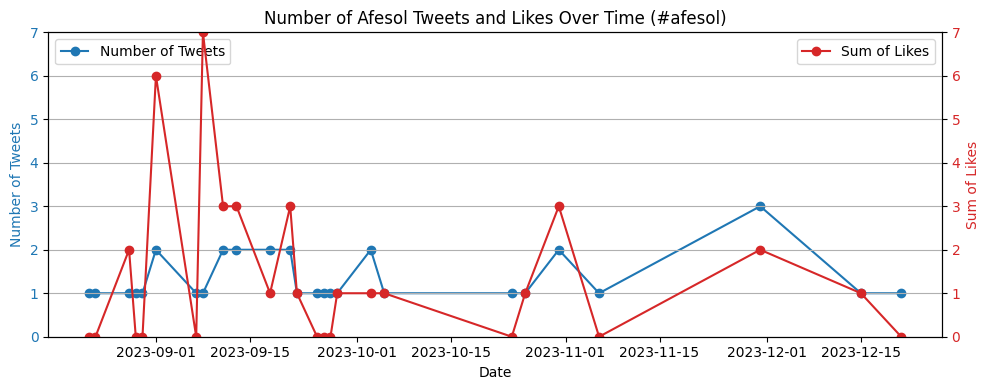

In [121]:
tweet_counts = tmp_df.groupby('Tweet_Date_Only')['Tweet_ID'].count()
likes_sum = tmp_df.groupby('Tweet_Date_Only')['Likes_Count'].sum()

# Determine the common y-axis limits
combined_min = min(tweet_counts.min(), likes_sum.min())
combined_max = max(tweet_counts.max(), likes_sum.max())

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot number of tweets on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Tweets', color=color)
ax1.plot(tweet_counts.index, tweet_counts.values, marker='o', linestyle='-', color=color, label='Number of Tweets')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax1.set_ylim(combined_min, combined_max)  # Set y-axis limits

# Create a secondary y-axis to plot sum of likes
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Sum of Likes', color=color)
ax2.plot(likes_sum.index, likes_sum.values, marker='o', linestyle='-', color=color, label='Sum of Likes')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')
ax2.set_ylim(combined_min, combined_max)  # Set y-axis limits

# Add title and grid
plt.title('Number of Afesol Tweets and Likes Over Time (#afesol)')
fig.tight_layout()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

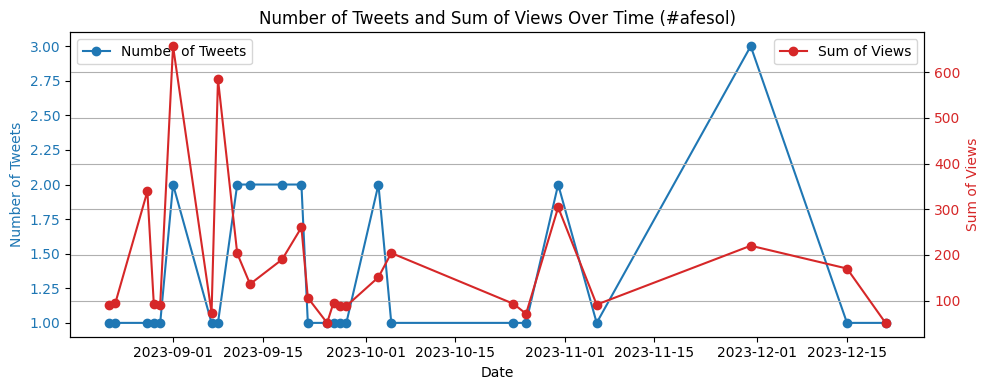

In [122]:
views_sum = tmp_df.groupby('Tweet_Date_Only')['Views_Count'].sum()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot number of tweets on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Tweets', color=color)
ax1.plot(tweet_counts.index, tweet_counts.values, marker='o', linestyle='-', color=color, label='Number of Tweets')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a secondary y-axis to plot sum of likes
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Sum of Views', color=color)
ax2.plot(views_sum.index, views_sum.values, marker='o', linestyle='-', color=color, label='Sum of Views')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Add title and grid
plt.title('Number of Tweets and Sum of Views Over Time (#afesol)')
fig.tight_layout()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

There seems to be reasonable correlation to the number of tweets posted and engagement (views and likes) with some exception in December, which we could attribute to holiday season.

During this time, X algorith may promote other contents that is more aligned to the season, thus we do not see as much push for the content.

In the list of tweet above, we saw that the post with least number of View was one of Christmas greeting.

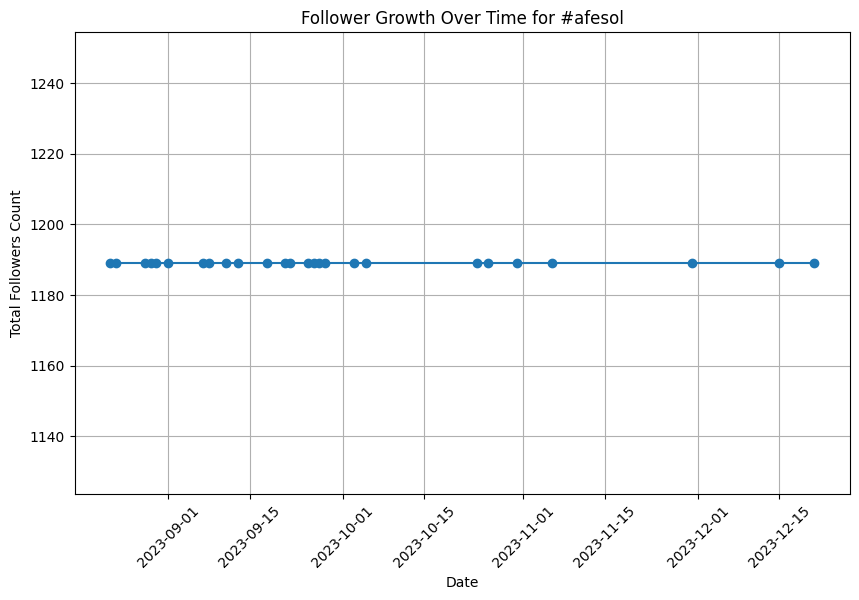

In [123]:
follower_growth_df = tmp_df.groupby('Tweet_Date_Only')['Followers_Count'].max().reset_index()

# Plot the follower growth over time
plt.figure(figsize=(10, 6))
plt.plot(follower_growth_df['Tweet_Date_Only'], follower_growth_df['Followers_Count'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Followers Count')
plt.title('Follower Growth Over Time for #afesol')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

There is no big change in the followers over time for the user posted #afesol hashtag.

# Specific Themes

In [124]:
# Define the keywords for each theme
tema_trabajo = ['trabajo', 'empleo', 'oficina', 'carrera', 'negocio', 'empresa']
tema_mujeres = ['mujeres', 'femenino', 'chica', 'mujer', 'damas', 'feminista', 'feminismo']
tema_educacion = ['escuela', 'colegio', 'universidad', 'instituto', 'estudiantil', 'estudiante', 'educación', 'académico', 'examen', 'bully', 'bullying', 'acoso', 'examen']


def contains_keywords(text, keywords):
    pattern = re.compile('|'.join(keywords), re.IGNORECASE)
    return bool(pattern.search(text))


# Apply the keyword search function again with translated keywords
df_spanish.loc[:,'tema_trabajo'] = df_spanish['Tweet_cleaned'].apply(lambda x: contains_keywords(x, tema_trabajo))
df_spanish.loc[:,'tema_mujeres'] = df_spanish['Tweet_cleaned'].apply(lambda x: contains_keywords(x, tema_mujeres))
df_spanish.loc[:,'tema_educacion'] = df_spanish['Tweet_cleaned'].apply(lambda x: contains_keywords(x, tema_educacion))

print("Number of X posts with work theme:",len(df_spanish[df_spanish['tema_trabajo']]))
print("Number of X posts with women theme:",len(df_spanish[df_spanish['tema_mujeres']]))
print("Number of X posts with education theme:",len(df_spanish[df_spanish['tema_educacion']]))

Number of X posts with work theme: 106
Number of X posts with women theme: 48
Number of X posts with education theme: 59


### Work theme

Is done because we do not see a lot of CSRs specifically on mental health.  But what do the people say?

In [125]:
tmp_df = df_spanish[df_spanish['tema_trabajo']]
work_df = tmp_df.groupby(['Tweet_Date_Only', 'py_label'])['Tweet_ID'].count().unstack(fill_value=0)

fig = go.Figure()

for label in work_df.columns:
    fig.add_trace(go.Scatter(x=work_df.index, y=work_df[label], mode='lines', name=f'py_label: {label}'))

fig.update_layout(
    title='X Posts with work related keywords over time',
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    )
)

fig.show()

In [126]:
print('double check that the chart is correct')
# check for one specific date
#date_to_check = '2023-08-29'
print(tmp_df.groupby('py_label')['Tweet_ID'].count())

print('\nCheck the engagement metrics for the posts')
engagement_metrics = ['Views_Count', 'Likes_Count', 'Replies_Count', 'Retweets_Count', 'Quotes_Count']
engagement_metrics_df = tmp_df.groupby('py_label')[engagement_metrics].sum()
engagement_metrics_df['Views_pct'] = engagement_metrics_df['Views_Count']/ engagement_metrics_df['Views_Count'].sum()
engagement_metrics_df['Likes_pct'] = engagement_metrics_df['Likes_Count']/ engagement_metrics_df['Likes_Count'].sum()

print(engagement_metrics_df)

print("\n ✅ Number of unique users created the posts:",tmp_df['User_Handle_hashed'].nunique())

print("\n 🐦 Tweets that generate most engagements:")
tmp_df[['Tweet_cleaned', 'Views_Count', 'Likes_Count', 'py_label']].sort_values(by=['Views_Count'], ascending=False).head(10)


double check that the chart is correct
py_label
neg    52
neu    22
pos    32
Name: Tweet_ID, dtype: int64

Check the engagement metrics for the posts
          Views_Count  Likes_Count  Replies_Count  Retweets_Count  \
py_label                                                            
neg             32373          457             44             117   
neu             12935          130             11              57   
pos             40642          330             32              74   

          Quotes_Count  Views_pct  Likes_pct  
py_label                                      
neg                  6   0.376649   0.498364  
neu                  1   0.150494   0.141767  
pos                  4   0.472856   0.359869  

 ✅ Number of unique users created the posts: 93

 🐦 Tweets that generate most engagements:


,Tweet_cleaned,Views_Count,Likes_Count,py_label
1357,"29 años, con mi propia empresa, con el dinero suficiente para estar tranquila, con la mejor pareja del mundo, con pocos amigos pero verdaderos, sin ansiedad ni depresión, con expectativas de mejorar todo esto a corto plazo. *borracha pero buena muchacha*",11594,27,pos
361,"2 temas de mis crónicas sanitarias : -La silicosis, principal enfermedad profesional de Andalucía y la empresa consentino por el daño colateral de trabajar sin protección encimeras -Ver películas puede mejorar nuestra saludmental Y más",5500,24,neg
2092,"Empujar cada día una empresa llena de vicisitudes y conseguir que siga creciendo, nueva familia preciosa, comer y viajar, luchar contra la ansiedad, sanar con running, volar a Granada para acompañar a la consulta de onco implorando una prórroga. La belleza y el empeño de existir.",5180,38,pos
227,"Puerto: ""No tengo redes sociales, me ayuda a vivir con mejor salud mental"" debería ser de obligada lectura para todos los deportistas profesionales y niños y niñas de cantera. Ética de trabajo y gestión de redes de un chaval de 24 años",4849,46,neg
352,"Celebramos el 30 aniversario de . 30 años en los que se han desplegado una red de servicios en beneficio de las personas con problemas de salud mental, con recursos asistenciales, programas de día, acceso al empleo y a la formación profesional y asesoramiento jurídico.",4465,34,pos
1612,"Alazne y María, enfermeras cun, acaban de terminar nuestro máster en cuidados especializados de enfermería en salud mental. En el día de la enfermería en salud mental resaltan la importancia de la comunicación en su trabajo y de la familia en la toma de decisiones.",3616,27,pos
609,"Pues hoy hacen 2 mesecitos justos que he entrado en la empresa. No tenía idea de cuánta satisfacción y salud mental habría ganado cambiando de trabajo. Si no estáis 100% satisfechos con vuestros trabajos, cambiad! Que la vida es demasiado corta para perder tiempo con el trabajo",3350,42,neg
492,"4 píldoras de mis crónicas sanitarias : -Debate uso del móvil: a los 12 años? A los 16? -Los investigadores podrán eludir la ""dictadura de los papers"" y revistas científicas -Escuela ante el bullying - y relación alta tensión en el trabajo y depresión",3294,10,neu
1894,El Hospital Vázquez Díaz de huelva ha finalizado los trabajos de rehabilitación y mejora en la Unidad de salud mental Infanto-Juvenil y en la fachada exterior del edificio. Gracias al artista urbano Jacobo Palos Wey por plasmar su obra en las paredes.,2566,15,pos
539,Superando mi ansiedad y tomando el control de mi carrera como DJ El resto en saludmental dj industriamusical,2490,39,neu


In [127]:
print("\n 😔 Negative Tweets:")
tmp_df[tmp_df['py_label'] == 'neg'][['Tweet_cleaned', 'Views_Count', 'Likes_Count', 'py_label']].sort_values(by=['Views_Count'], ascending=False).head(20)



 😔 Negative Tweets:


,Tweet_cleaned,Views_Count,Likes_Count,py_label
361,"2 temas de mis crónicas sanitarias : -La silicosis, principal enfermedad profesional de Andalucía y la empresa consentino por el daño colateral de trabajar sin protección encimeras -Ver películas puede mejorar nuestra saludmental Y más",5500,24,neg
227,"Puerto: ""No tengo redes sociales, me ayuda a vivir con mejor salud mental"" debería ser de obligada lectura para todos los deportistas profesionales y niños y niñas de cantera. Ética de trabajo y gestión de redes de un chaval de 24 años",4849,46,neg
609,"Pues hoy hacen 2 mesecitos justos que he entrado en la empresa. No tenía idea de cuánta satisfacción y salud mental habría ganado cambiando de trabajo. Si no estáis 100% satisfechos con vuestros trabajos, cambiad! Que la vida es demasiado corta para perder tiempo con el trabajo",3350,42,neg
90,"- La situación en la que quedan los SUBSIDIOS por desempleo para los mayores de 52 años que nos deja , Caudilla de Ferrol y Desbrozadora de Galicia, terminará convietiéndose, para muchos, en un SUICIDIO por desempleo. - Tiempo al tiempo",2463,100,neg
983,"Muchos de los problemas de salud mental que existen, derivan del sufrimiento que verdaderos ""verdugos"" infligen a diario a los que tienen al lado: vecinos, compañeros de trabajo, jefes, familiares, tuiteros Que no seamos uno de ellos. dia mundialdela salud mental",2328,36,neg
1230,"¿Por qué se empezaron a vender palomitas en los cines? La costumbre se remonta a los años de la Gran Depresión, que hizo que millones, perdiesen sus empleos. Entonces, el cine era el pasatiempo estrella, y el maíz, un producto tremendamente abundante y barato en Estados Unidos.",2095,31,neg
1336,"Se avecinan cambios. Separación, quedarme sola, intentar subsistir, mantener sola a todos los animales de la protectora, buscar trabajo aunque no esté bien psicológicamente, estudiar los fps, y todo con mi baja de 800$ que se acaba el mes viene. Súmale TLP ansiedad y depresión.",1325,25,neg
1922,"Estoy al borde del colapso ( otra vez ) Estudio y trabajo (39h/semana) al mismo tiempo,con un contrato básico y triste, sumado a el estrés y depresión ( de la cual estoy muuucho mejor que hace 5 años ) me está consumiendo mental y físicamente. Universo cambia mi suerte YA",838,11,neg
6,"Los nómadas digitales no crean riqueza en el lugar al que van porque tributan fuera, pero suben el precio de los servicios y desplazan a los locales. No tengo nada en contra de que la gente deslocalice su lugar de trabajo, pero convertir esto en el modelo es un suicidio anunciado",807,29,neg
1651,"Que pereza estar hasta arriba de trabajo acumulado, de baja por depresión y enfermarte por coger frío al mismo tiempo",722,13,neg


In [128]:
print("\n 🥰 Positive Tweets:")
tmp_df[tmp_df['py_label'] == 'pos'][['Tweet_cleaned', 'Views_Count', 'Likes_Count', 'py_label']].sort_values(by=['Views_Count'], ascending=False).head(20)



 🥰 Positive Tweets:


,Tweet_cleaned,Views_Count,Likes_Count,py_label
1357,"29 años, con mi propia empresa, con el dinero suficiente para estar tranquila, con la mejor pareja del mundo, con pocos amigos pero verdaderos, sin ansiedad ni depresión, con expectativas de mejorar todo esto a corto plazo. *borracha pero buena muchacha*",11594,27,pos
2092,"Empujar cada día una empresa llena de vicisitudes y conseguir que siga creciendo, nueva familia preciosa, comer y viajar, luchar contra la ansiedad, sanar con running, volar a Granada para acompañar a la consulta de onco implorando una prórroga. La belleza y el empeño de existir.",5180,38,pos
352,"Celebramos el 30 aniversario de . 30 años en los que se han desplegado una red de servicios en beneficio de las personas con problemas de salud mental, con recursos asistenciales, programas de día, acceso al empleo y a la formación profesional y asesoramiento jurídico.",4465,34,pos
1612,"Alazne y María, enfermeras cun, acaban de terminar nuestro máster en cuidados especializados de enfermería en salud mental. En el día de la enfermería en salud mental resaltan la importancia de la comunicación en su trabajo y de la familia en la toma de decisiones.",3616,27,pos
1894,El Hospital Vázquez Díaz de huelva ha finalizado los trabajos de rehabilitación y mejora en la Unidad de salud mental Infanto-Juvenil y en la fachada exterior del edificio. Gracias al artista urbano Jacobo Palos Wey por plasmar su obra en las paredes.,2566,15,pos
551,"Plan Intergeneracional de la Juventud ¡Gracias por acogernos una vez más! Jornada importante sobre vivienda, salud mental y empleo previa a las manifestaciones de mañana. España necesita Estado de derecho y democracia pero oportunidades para sus jóvenes.",1714,19,pos
1025,"Hoy, que es el Día de la Salud Mental, pienso en mi madre, toda una vida dedicada profesionalmente a ello. Sin podcasts, libros ni citas famosas... Trabajo diario y perfil bajo, salvando vidas y alegrando almas. La admiro.",1479,14,pos
854,"Que importante es saber cuando marcharse y no quedarse en un entorno tóxico. Aplica para el trabajo, la fiesta, las relaciones. Hoy cerré un ciclo que me estaba consumiendo, y la paz que siento en este momento es invaluable. Prioricemos siempre la salud mental.",1322,11,pos
1200,Celebro enormemente que se de continuidad al proyecto de prevención del suicidio y de gestión emocional. Muy bien el y siempre agradecido a por todo su trabajo.,1074,8,pos
420,"Tarde de trabajo en majadahonda con para presentar alegaciones a los presupuestos de la Comunidad de Madrid. Nuevo Centro de Salud Mental, tercer Centro Salud, Instituto para el barrio de Carralero y soterramiento M503 a su paso Los Satélites para mejorar movilidad.",1052,31,pos


In [129]:
# check for one specific date
date_to_check = '2023-08-29'
print(tmp_df[tmp_df['Tweet_Date_Only'] == date_to_check].groupby('py_label')['Tweet_ID'].count())

py_label
neg    3
Name: Tweet_ID, dtype: int64
